# Pandas 한번에 제대로 배우기

* 관계 또는 레이블링 데이터로 쉽고 직관적으로 작업할 수 있도록 고안된 빠르고 유연하며 표현력이 뛰어난 데이터 구조를 제공하는 Python 패키지



---



## Pandas 특징

* 부동 소수점이 아닌 데이터 뿐만 아니라 부동 소수점 데이터에서도 결측 데이터(NaN으로 표시됨)를 쉽게 처리
* 크기 변이성(Size Mutability): DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
* 자동 및 명시적(Explicit) 데이터 정렬: 객체를 라벨 집합에 명시적을 정렬하거나, 사용자가 라벨을 무시하고 Series, DataFrame 등의 계산에서 자동을 데이터 조정 가능
* 데이터 세트에서 집계 및 변환을 위한 분할(split), 적용(apply), 결합(combine)작업을 수행할 수 있는 강력하고 유연한 group-by 함수 제공
* 누락된 데이터 또는 다른 Python 및 Numpy 데이터 구조에서 서로 다른 인덱싱 데이터를 DataFrame 개체로 쉽게 변환
* 대용량 데이터 세트의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집합 구하기 가능
* 직관적인 데이터 세트 병합 및 결합
* 축의 계층적 라벨링(눈금당 여러 개의 라벨를 가질 수 있음)
* 플랫 파일(CSV 및 구분), Excel 파일, 데이터베이스 로딩 및 초고속 HDF5 형식으 ㅣ데이터 저장/로드에 사용되는 강력한 IO 도구
* 시계열 특정 기능: 날짜 범위 생성 및 주파수 변환, 무빙 윈도우(moving window) 통계, 날짜 이동 및 지연

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.1.5'

## Pandas 객체


### Series 객체

In [2]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [3]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [4]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
 s[1]

0.25

In [6]:
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [7]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [8]:
 s['c']

0.5

In [9]:
s[['c', 'd', 'e']]

c    0.50
d    0.75
e    1.00
dtype: float64

In [10]:
'b' in s

True

In [11]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=[2, 4, 6, 8, 10])
s

2     0.00
4     0.25
6     0.50
8     0.75
10    1.00
dtype: float64

In [12]:
s[4]

0.25

In [13]:
s[2:]

6     0.50
8     0.75
10    1.00
dtype: float64

In [14]:
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [15]:
s.value_counts()

1.00    1
0.75    1
0.50    1
0.25    1
0.00    1
dtype: int64

In [16]:
s.isin([0.25, 0.75])

2     False
4      True
6     False
8      True
10    False
dtype: bool

In [17]:
pop_tuple = {'서울특별시': 9720846,
             '부산광역시': 3404423,
             '인천광역시': 2947217,
             '대구광역시': 2427954,
             '대전광역시': 1471040,
             '광주광역시': 1455048}
population = pd.Series(pop_tuple)
population

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
dtype: int64

In [18]:
population['서울특별시']

9720846

In [19]:
population['서울특별시':'대전광역시']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
dtype: int64

### DataFrame 객체

In [20]:
pd.DataFrame([{'A':2, 'B':4, 'D':3}, {'A':4, 'B':5, 'C':7}])

,A,B,D,C
0,2,4,3.0,NaN
1,4,5,NaN,7.0


In [21]:
pd.DataFrame(np.random.rand(5, 5),
             columns=['A', 'B', 'C', 'D', 'E'],
             index=[1, 2, 3, 4, 5])

,A,B,C,D,E
1,0.274794,0.382745,0.209421,0.177234,0.902702
2,0.507017,0.647458,0.901036,0.062408,0.176078
3,0.870021,0.786656,0.141413,0.108986,0.947324
4,0.147540,0.269481,0.139108,0.266402,0.918846
5,0.736759,0.023915,0.127103,0.689515,0.623523


In [22]:
male_tuple = {'서울특별시': 4732275,
             '부산광역시': 1668618,
             '인천광역시': 1476813,
             '대구광역시': 1198815,
             '대전광역시': 1198815,
             '광주광역시': 1455048}
male = pd.Series(male_tuple)
male

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시    1198815
광주광역시    1455048
dtype: int64

In [23]:
female_tuple = {'서울특별시': 4988571,
             '부산광역시': 1735805,
             '인천광역시': 1470404,
             '대구광역시': 1229139,
             '대전광역시': 736599,
             '광주광역시': 734988}
female = pd.Series(female_tuple)
female

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
dtype: int64

In [24]:
# 한 컬럼에 한 series가 사용
korea_df = pd.DataFrame({'인구수': population,
                         '남자인구수':male,
                         '여자인구수':female})
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,1198815,736599
광주광역시,1455048,1455048,734988


In [25]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시'], dtype='object')

In [26]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

In [27]:
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [28]:
korea_df['서울특별시':'인천광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404


### Index 객체

|클래스|설명|
|--|--|
|index|일반적인 index 객체이며, Numpy 배열 형식으로 축의 이름 표현|
|int64index|정수 값을 위한 index|
|Multiindex|단일 축에 여러 단계 색인을 표현하는 계층적 index 객체(튜플의 배열과 유사)|
|Datetimeindex|Numpy의 datatime64타입으로 타임스탬프 저장|
|Periodindex|기간 데이터를 위한 index

In [29]:
idx = pd.Index([2, 4, 6, 8, 10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [30]:
idx[1]

4

In [31]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [32]:
idx[-1::]

Int64Index([10], dtype='int64')

In [33]:
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [34]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

|연산자|메소드|설명|
|--|--|--|
||``append``|색인 객체를 추가한 새로운 색이 반환
||``difference``|색인의 차집합 반환
|``&``|``intersection``|색인의 교집합 반환
|``\|``|``union``|색인의 합집합 반환|
||``isin``|색인이 존재하는지 여부를 부리언 배열로 반환
||``delete``|색인이 삭제된 새로운 색인 반환
||``drop``|값이 삭제된 새로운 색인 반환
||``insert``|색인이 추가된 새로운 색인 반환
||``is_monotonic``|색인이 단조성을 가지면 True
||``is_unique``|중복되는 색인이 없다면 True
||``unique``|색인에서 중복되는 요소를 제거하고 유일한 값만 반환

In [35]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6 ,7])
print(idx1.append(idx2))
print(idx1.difference(idx2))
print(idx1 - idx2)
print(idx1.intersection(idx2))
print(idx1 & idx2)
print(idx1.union(idx2))
print(idx1 | idx2)
print(idx1.delete(0))
print(idx1.drop(1))
print(idx1 ^ idx2) # 여집합 (공통된것을 뺀 나머지)

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')




---



## 인덱싱(Indexing)

In [36]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [37]:
s['b']

0.25

In [38]:
'b' in s

True

In [39]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [40]:
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [41]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [42]:
s['a':'d']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [43]:
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [44]:
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [45]:
s[['a', 'c', 'e']]

a    0.0
c    0.5
e    1.0
dtype: float64

### Series 인덱싱

In [46]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
              index=[1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [47]:
s[1]

'a'

In [48]:
s[2:4]

5    c
7    d
dtype: object

In [49]:
s.iloc[1]   # 0,1,2,3... 인데스로 위치

'b'

In [50]:
s.iloc[2:4]

5    c
7    d
dtype: object

In [51]:
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [52]:
s.reindex(range(10), method='bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱

|사용 방법|설명|
|--|--|
|`df[val]`|하나의 컬럼 또는 여러 컬럼을 선택
|`df.loc[val]`|라벨값으로 로우의 부분집합 선택
|`df.loc[:,val]`|라벨값으로 컬럼의 부분집합 선택
|`df.loc[val1,val2]`|라벨값으로 로우와 컬럼의 부분집합 선택
|`df.iloc[where]`|정수 색인으로 로우의 부분집합 선택
|`df.iloc[:,where]`|정수 색인으로 컬럼의 부분집합 선택
|`df.iloc[where_i, where_j]`|정수 색인으로 로우와 컬럼의 부분집합 선택
|`df.at[label_i, label_j]`|로우와 컬럼의 라벨로 단일 값 선택
|`df.iat[i, j]`|로우와 컬럼의 정수 색인으로 단일 값 선택
|`reindex`|하나 이상의 축을 새로운 색인을 ㅗ재색인
|`get_value, set_value`|로우와 컬럼의 이름으로 값 선택

In [53]:
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,1198815,736599
광주광역시,1455048,1455048,734988


In [54]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시    1198815
광주광역시    1455048
Name: 남자인구수, dtype: int64

In [55]:
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시    1198815
광주광역시    1455048
Name: 남자인구수, dtype: int64

In [56]:
korea_df.여자인구수

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [57]:
korea_df['남여비율'] = (korea_df['남자인구수'] * 100 / korea_df['여자인구수'])

In [58]:
korea_df.남여비율

서울특별시     94.862336
부산광역시     96.129346
인천광역시    100.435867
대구광역시     97.532907
대전광역시    162.750017
광주광역시    197.968946
Name: 남여비율, dtype: float64

In [59]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 1.19881500e+06, 7.36599000e+05, 1.62750017e+02],
       [1.45504800e+06, 1.45504800e+06, 7.34988000e+05, 1.97968946e+02]])

In [60]:
korea_df.T

,서울특별시,부산광역시,인천광역시,대구광역시,대전광역시,광주광역시
인구수,9.720846e+06,3.404423e+06,2.947217e+06,2.427954e+06,1.471040e+06,1.455048e+06
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,1.198815e+06,1.455048e+06
여자인구수,4.988571e+06,1.735805e+06,1.470404e+06,1.229139e+06,7.365990e+05,7.349880e+05
남여비율,9.486234e+01,9.612935e+01,1.004359e+02,9.753291e+01,1.627500e+02,1.979689e+02


In [61]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [62]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
Name: 인구수, dtype: int64

In [63]:
korea_df.loc[:'인천광역시', :'남자인구수']

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


In [64]:
korea_df.loc[(korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [65]:
korea_df.loc[(korea_df.인구수 < 2000000)]

,인구수,남자인구수,여자인구수,남여비율
대전광역시,1471040,1198815,736599,162.750017
광주광역시,1455048,1455048,734988,197.968946


In [66]:
korea_df.loc[(korea_df.인구수 > 2500000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867


In [67]:
korea_df.loc[korea_df.남여비율 > 100]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867
대전광역시,1471040,1198815,736599,162.750017
광주광역시,1455048,1455048,734988,197.968946


In [68]:
korea_df[(korea_df.인구수 > 2500000) & (korea_df.남여비율 > 100)]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [69]:
korea_df.iloc[:3, :2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [70]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,1198815,736599,162.750017
광주광역시,1455048,1455048,734988,197.968946


In [71]:
idx_tuples =[('서울특별시', 2010), ('서울특별시', 2020),
            ('부산광역시', 2010), ('부산광역시', 2020),
            ('인천광역시', 2010), ('인천광역시', 2020),
            ('대구광역시', 2010), ('대구광역시', 2020),
            ('대전광역시', 2010), ('대전광역시', 2020),
            ('광주광역시', 2010), ('광주광역시', 2020),]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [72]:
pop_tuples = [10312545, 9720846,
              2567910, 3404423,
              2758296, 2947217,
              1511676, 2427954,
              1503664, 1471040,
              1454636, 1455048]
population = pd.Series(pop_tuples, index=idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2947217
(대구광역시, 2010)     1511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [73]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [74]:
population = population.reindex(midx)
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     1511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [75]:
population[:, 2010]

서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     1511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [76]:
population['대전광역시', :]

2010    1503664
2020    1471040
dtype: int64

In [77]:
korea_mdf = population.unstack()
korea_mdf

,2010,2020
광주광역시,1454636,1455048
대구광역시,1511676,2427954
대전광역시,1503664,1471040
부산광역시,2567910,3404423
서울특별시,10312545,9720846
인천광역시,2758296,2947217


In [78]:
korea_mdf.stack()

광주광역시  2010     1454636
       2020     1455048
대구광역시  2010     1511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     2567910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [79]:
male_tuple = [5111259, 4732275,
              1773170, 1668618,
              1390356, 1476813,
              1255245, 1198815,
              753648, 734441,
              721780, 720060]
male_tuple

[5111259,
 4732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 734441,
 721780,
 720060]

In [80]:
korea_mdf = pd.DataFrame({'총인구수':population,
                          '남자인구수':male_tuple})
korea_mdf

총인구수    남자인구수
서울특별시 2010  10312545  5111259
      2020   9720846  4732275
부산광역시 2010   2567910  1773170
      2020   3404423  1668618
인천광역시 2010   2758296  1390356
      2020   2947217  1476813
대구광역시 2010   1511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
광주광역시 2010   1454636   721780
      2020   1455048   720060

In [81]:
female_tuples = [5201286, 4988571,
                 1794740, 1735805,
                 1367940, 1470404,
                 1256431, 1229139,
                 750016, 736599,
                 732856, 734988]
female_tuples

[5201286,
 4988571,
 1794740,
 1735805,
 1367940,
 1470404,
 1256431,
 1229139,
 750016,
 736599,
 732856,
 734988]

In [82]:
korea_mdf = pd.DataFrame({'총인구수':population,
                          '남자인구수':male_tuple,
                          '여자인구수':female_tuples})
korea_mdf

총인구수    남자인구수    여자인구수
서울특별시 2010  10312545  5111259  5201286
      2020   9720846  4732275  4988571
부산광역시 2010   2567910  1773170  1794740
      2020   3404423  1668618  1735805
인천광역시 2010   2758296  1390356  1367940
      2020   2947217  1476813  1470404
대구광역시 2010   1511676  1255245  1256431
      2020   2427954  1198815  1229139
대전광역시 2010   1503664   753648   750016
      2020   1471040   734441   736599
광주광역시 2010   1454636   721780   732856
      2020   1455048   720060   734988

In [83]:
ratio = korea_mdf['남자인구수'] * 100 / korea_mdf['여자인구수']
ratio

서울특별시  2010     98.269140
       2020     94.862336
부산광역시  2010     98.798155
       2020     96.129346
인천광역시  2010    101.638668
       2020    100.435867
대구광역시  2010     99.905606
       2020     97.532907
대전광역시  2010    100.484256
       2020     99.707032
광주광역시  2010     98.488653
       2020     97.968946
dtype: float64

In [84]:
ratio.unstack()

,2010,2020
광주광역시,98.488653,97.968946
대구광역시,99.905606,97.532907
대전광역시,100.484256,99.707032
부산광역시,98.798155,96.129346
서울특별시,98.269140,94.862336
인천광역시,101.638668,100.435867


In [85]:
korea_mdf = pd.DataFrame({'총인구수':population,
                          '남자인구수':male_tuple,
                          '여자인구수':female_tuples,
                          '남여비율':ratio})
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   1511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946

#### 다중 인덱스 생성

In [86]:
df = pd.DataFrame(np.random.rand(6, 3),
                  index=[['a', 'a', 'b', 'b', 'c', 'c'], [1, 2, 1, 2, 1, 2]],
                  columns=['c1', 'c2', 'c3'])
df

c1        c2        c3
a 1  0.244485  0.326465  0.135103
  2  0.830642  0.562550  0.342497
b 1  0.261015  0.145374  0.824232
  2  0.182803  0.530859  0.065673
c 1  0.944513  0.262463  0.406668
  2  0.453061  0.641334  0.343605

In [87]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b', 'c', 'c'], [1, 2, 1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [88]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2),  ('c', 1), ('c', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [89]:
pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [90]:
pd.MultiIndex(levels=[['a', 'b', 'c'], [1, 2]],
              codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [91]:
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     1511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [92]:
population.index.names = ['행정구역', '년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     1511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [93]:
idx = pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]],
                                 names=['name1', 'name2'])
cols = pd.MultiIndex.from_product([['c1', 'c2', 'c3'], [1, 2]],
                                  names=['col_name1', 'col_name2'])
data = np.round(np.random.randn(6, 6), 2)
mdf = pd.DataFrame(data, index=idx, columns=cols)
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1     -2.94 -2.63 -1.55  1.07  0.20  1.67
      2      0.69  0.15 -0.76  0.42 -1.80 -1.17
b     1      0.55  1.14 -0.14 -1.70  0.17 -0.62
      2     -1.45  1.17 -1.19  0.15  0.68 -0.59
c     1      0.99 -0.34  0.40  1.20  0.24 -0.43
      2      0.17 -0.41  0.49 -0.18  0.73 -1.10

In [94]:
mdf['c2']

col_name2       1     2
name1 name2            
a     1     -1.55  1.07
      2     -0.76  0.42
b     1     -0.14 -1.70
      2     -1.19  0.15
c     1      0.40  1.20
      2      0.49 -0.18

#### 인덱싱 및 슬라이싱

In [95]:
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     1511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [96]:
population['인천광역시', 2010]

2758296

In [97]:
population[:, 2010]

행정구역
서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     1511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [98]:
population[population > 3000000]

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2020     3404423
dtype: int64

In [99]:
population[['대구광역시', '대전광역시']]

행정구역   년도  
대구광역시  2010    1511676
       2020    2427954
대전광역시  2010    1503664
       2020    1471040
dtype: int64

In [100]:
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1     -2.94 -2.63 -1.55  1.07  0.20  1.67
      2      0.69  0.15 -0.76  0.42 -1.80 -1.17
b     1      0.55  1.14 -0.14 -1.70  0.17 -0.62
      2     -1.45  1.17 -1.19  0.15  0.68 -0.59
c     1      0.99 -0.34  0.40  1.20  0.24 -0.43
      2      0.17 -0.41  0.49 -0.18  0.73 -1.10

In [101]:
mdf['c2', 1]

name1  name2
a      1       -1.55
       2       -0.76
b      1       -0.14
       2       -1.19
c      1        0.40
       2        0.49
Name: (c2, 1), dtype: float64

In [102]:
mdf.iloc[:3, :4]

col_name1      c1          c2      
col_name2       1     2     1     2
name1 name2                        
a     1     -2.94 -2.63 -1.55  1.07
      2      0.69  0.15 -0.76  0.42
b     1      0.55  1.14 -0.14 -1.70

In [103]:
mdf.loc[:, ('c2', 1)]

name1  name2
a      1       -1.55
       2       -0.76
b      1       -0.14
       2       -1.19
c      1        0.40
       2        0.49
Name: (c2, 1), dtype: float64

In [104]:
idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:, 2], idx_slice[:, 1]]

,col_name1,c1,c2,c3
,col_name2,1,1,1
name1,name2,,,
a,2,0.69,-0.76,-1.80
b,2,-1.45,-1.19,0.68
c,2,0.17,0.49,0.73


#### 다중 인덱스 재정렬

In [105]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   1511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946

In [106]:
# korea_mdf['서울특별시':'인천광역시'] # 정렬이 안되어있어서 오류

korea_mdf = korea_mdf.sort_index()
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   1511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [107]:
korea_mdf['서울특별시':'인천광역시']  # 정렬 이후 가능

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [108]:
korea_mdf.unstack(level=0)

총인구수                    ...       남여비율                       
행정구역    광주광역시    대구광역시    대전광역시  ...      부산광역시      서울특별시       인천광역시
년도                               ...                                  
2010  1454636  1511676  1503664  ...  98.798155  98.269140  101.638668
2020  1455048  2427954  1471040  ...  96.129346  94.862336  100.435867

[2 rows x 24 columns]

In [109]:
korea_mdf.unstack(level=1)

총인구수             남자인구수  ...    여자인구수        남여비율            
년도         2010     2020     2010  ...     2020        2010        2020
행정구역                               ...                                 
광주광역시   1454636  1455048   721780  ...   734988   98.488653   97.968946
대구광역시   1511676  2427954  1255245  ...  1229139   99.905606   97.532907
대전광역시   1503664  1471040   753648  ...   736599  100.484256   99.707032
부산광역시   2567910  3404423  1773170  ...  1735805   98.798155   96.129346
서울특별시  10312545  9720846  5111259  ...  4988571   98.269140   94.862336
인천광역시   2758296  2947217  1390356  ...  1470404  101.638668  100.435867

[6 rows x 8 columns]

In [110]:
korea_mdf.stack()

행정구역   년도         
광주광역시  2010  총인구수     1.454636e+06
             남자인구수    7.217800e+05
             여자인구수    7.328560e+05
             남여비율     9.848865e+01
       2020  총인구수     1.455048e+06
             남자인구수    7.200600e+05
             여자인구수    7.349880e+05
             남여비율     9.796895e+01
대구광역시  2010  총인구수     1.511676e+06
             남자인구수    1.255245e+06
             여자인구수    1.256431e+06
             남여비율     9.990561e+01
       2020  총인구수     2.427954e+06
             남자인구수    1.198815e+06
             여자인구수    1.229139e+06
             남여비율     9.753291e+01
대전광역시  2010  총인구수     1.503664e+06
             남자인구수    7.536480e+05
             여자인구수    7.500160e+05
             남여비율     1.004843e+02
       2020  총인구수     1.471040e+06
             남자인구수    7.344410e+05
             여자인구수    7.365990e+05
             남여비율     9.970703e+01
부산광역시  2010  총인구수     2.567910e+06
             남자인구수    1.773170e+06
             여자인구수    1.794740e+06
             남여비율     9.879815e+01
 

In [111]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   1511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [112]:
idx_flat = korea_mdf.reset_index(level=0)
idx_flat

,행정구역,총인구수,남자인구수,여자인구수,남여비율
년도,,,,,
2010,광주광역시,1454636,721780,732856,98.488653
2020,광주광역시,1455048,720060,734988,97.968946
2010,대구광역시,1511676,1255245,1256431,99.905606
2020,대구광역시,2427954,1198815,1229139,97.532907
2010,대전광역시,1503664,753648,750016,100.484256
2020,대전광역시,1471040,734441,736599,99.707032
2010,부산광역시,2567910,1773170,1794740,98.798155
2020,부산광역시,3404423,1668618,1735805,96.129346
2010,서울특별시,10312545,5111259,5201286,98.269140


In [113]:
idx_flat = korea_mdf.reset_index(level=(0, 1))
idx_flat

,행정구역,년도,총인구수,남자인구수,여자인구수,남여비율
0,광주광역시,2010,1454636,721780,732856,98.488653
1,광주광역시,2020,1455048,720060,734988,97.968946
2,대구광역시,2010,1511676,1255245,1256431,99.905606
3,대구광역시,2020,2427954,1198815,1229139,97.532907
4,대전광역시,2010,1503664,753648,750016,100.484256
5,대전광역시,2020,1471040,734441,736599,99.707032
6,부산광역시,2010,2567910,1773170,1794740,98.798155
7,부산광역시,2020,3404423,1668618,1735805,96.129346
8,서울특별시,2010,10312545,5111259,5201286,98.269140
9,서울특별시,2020,9720846,4732275,4988571,94.862336


In [114]:
idx_flat.set_index(['행정구역', '년도'])

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   1511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

## 데이터 연산

In [115]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    5
1    5
2    2
3    7
4    1
dtype: int64

In [116]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,4,4,1
1,5,4,2
2,0,7,3


In [117]:
np.exp(s)

0     148.413159
1     148.413159
2       7.389056
3    1096.633158
4       2.718282
dtype: float64

In [118]:
np.cos(df * np.pi / 4)

,A,B,C
0,-1.000000,-1.000000,7.071068e-01
1,-0.707107,-1.000000,6.123234e-17
2,1.000000,0.707107,-7.071068e-01


In [119]:
s1 = pd.Series([1, 3, 5,  7, 9], index=[0, 1, 2, 3, 4])
s2 = pd.Series([2, 4, 6, 8, 10], index=[1, 2, 3, 4, 5])
s1 + s2 # index가 기준으로 연산, 없으면 NaN

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [120]:
s1.add(s2, fill_value=0)

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [121]:
df1 = pd.DataFrame(np.random.randint(0, 20, (3, 3)),
                   columns=list('ACD'))
df1

,A,C,D
0,8,4,5
1,15,12,16
2,11,2,2


In [122]:
df2 = pd.DataFrame(np.random.randint(0, 20, (5, 5)),
                   columns=list('BAECD'))
df2

,B,A,E,C,D
0,9,13,4,11,5
1,12,9,2,3,10
2,13,18,8,1,7
3,5,7,13,13,14
4,14,12,18,1,1


In [123]:
df1 + df2

,A,B,C,D,E
0,21.0,NaN,15.0,10.0,NaN
1,24.0,NaN,15.0,26.0,NaN
2,29.0,NaN,3.0,9.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [124]:
 fvalue = df1.stack().mean()
 df1.add(df2, fill_value=fvalue)

,A,B,C,D,E
0,21.000000,17.333333,15.000000,10.000000,12.333333
1,24.000000,20.333333,15.000000,26.000000,10.333333
2,29.000000,21.333333,3.000000,9.000000,16.333333
3,15.333333,13.333333,21.333333,22.333333,21.333333
4,20.333333,22.333333,9.333333,9.333333,26.333333


### 연산자 범용 함수

|Python 연산자|Pandas 메소드|
|--|--|
|`+`|`add`, `radd`|
|`-`|`sub`,`rsub`,`subtract`|
|`*`|`mul`,`rmul`,`multiply`|
|`/`|`truediv`,`div`,`rdiv`,`divide`|
|`//`|`floordiv`,`rfloordiv`|
|`%`|`mod`|
|`**`|`pow`,`rpow`|

#### add()

In [125]:
a = np.random.randint(1, 10, size=(3, 3))
a

array([[2, 1, 8],
       [8, 8, 4],
       [1, 9, 4]])

In [126]:
a + a[0]

array([[ 4,  2, 16],
       [10,  9, 12],
       [ 3, 10, 12]])

In [127]:
df = pd.DataFrame(a, columns=list('ABC'))
df

,A,B,C
0,2,1,8
1,8,8,4
2,1,9,4


In [128]:
df + df.iloc[0]

,A,B,C
0,4,2,16
1,10,9,12
2,3,10,12


In [129]:
df.add(df.iloc[0])

,A,B,C
0,4,2,16
1,10,9,12
2,3,10,12


#### sub() / subtract()

In [130]:
a

array([[2, 1, 8],
       [8, 8, 4],
       [1, 9, 4]])

In [131]:
a - a[0]

array([[ 0,  0,  0],
       [ 6,  7, -4],
       [-1,  8, -4]])

In [132]:
df

,A,B,C
0,2,1,8
1,8,8,4
2,1,9,4


In [133]:
df - df.iloc[0]

,A,B,C
0,0,0,0
1,6,7,-4
2,-1,8,-4


In [134]:
df.sub(df.iloc[0])

,A,B,C
0,0,0,0
1,6,7,-4
2,-1,8,-4


In [135]:
df.subtract(df['B'], axis=0)

,A,B,C
0,1,0,7
1,0,0,-4
2,-8,0,-5


#### mul() / multply()




In [136]:
a

array([[2, 1, 8],
       [8, 8, 4],
       [1, 9, 4]])

In [137]:
a * a[1]

array([[16,  8, 32],
       [64, 64, 16],
       [ 8, 72, 16]])

In [138]:
df

,A,B,C
0,2,1,8
1,8,8,4
2,1,9,4


In [139]:
df * df.iloc[1]

,A,B,C
0,16,8,32
1,64,64,16
2,8,72,16


In [140]:
df.mul(df.iloc[1])

,A,B,C
0,16,8,32
1,64,64,16
2,8,72,16


In [141]:
df.multiply(df.iloc[2])

,A,B,C
0,2,9,32
1,8,72,16
2,1,81,16


#### truediv() /  div() / divide() / floordiv()

In [142]:
a

array([[2, 1, 8],
       [8, 8, 4],
       [1, 9, 4]])

In [143]:
a / a[0]

array([[1. , 1. , 1. ],
       [4. , 8. , 0.5],
       [0.5, 9. , 0.5]])

In [144]:
df

,A,B,C
0,2,1,8
1,8,8,4
2,1,9,4


In [145]:
df / df.iloc[0]

,A,B,C
0,1.0,1.0,1.0
1,4.0,8.0,0.5
2,0.5,9.0,0.5


In [146]:
df.truediv(df.iloc[0])

,A,B,C
0,1.0,1.0,1.0
1,4.0,8.0,0.5
2,0.5,9.0,0.5


In [147]:
df.div(df.iloc[1])

,A,B,C
0,0.250,0.125,2.0
1,1.000,1.000,1.0
2,0.125,1.125,1.0


In [148]:
df.divide(df.iloc[2])

,A,B,C
0,2.0,0.111111,2.0
1,8.0,0.888889,1.0
2,1.0,1.000000,1.0


In [149]:
a // a[0]

array([[1, 1, 1],
       [4, 8, 0],
       [0, 9, 0]])

In [150]:
df. floordiv(df.iloc[0])

,A,B,C
0,1,1,1
1,4,8,0
2,0,9,0


#### mod()

In [151]:
a

array([[2, 1, 8],
       [8, 8, 4],
       [1, 9, 4]])

In [152]:
a % a[0]

array([[0, 0, 0],
       [0, 0, 4],
       [1, 0, 4]])

In [153]:
df

,A,B,C
0,2,1,8
1,8,8,4
2,1,9,4


In [154]:
df.mod(df.iloc[0])

,A,B,C
0,0,0,0
1,0,0,4
2,1,0,4


#### pow()

In [155]:
a

array([[2, 1, 8],
       [8, 8, 4],
       [1, 9, 4]])

In [156]:
a ** a[0]

array([[       4,        1, 16777216],
       [      64,        8,    65536],
       [       1,        9,    65536]])

In [157]:
df

,A,B,C
0,2,1,8
1,8,8,4
2,1,9,4


In [158]:
df.pow(df.iloc[0])

,A,B,C
0,4,1,16777216
1,64,8,65536
2,1,9,65536


In [159]:
row = df.iloc[0, ::2]
row

A    2
C    8
Name: 0, dtype: int64

In [160]:
df - row

,A,B,C
0,0.0,NaN,0.0
1,6.0,NaN,-4.0
2,-1.0,NaN,-4.0


### 정렬(Sort)

In [161]:
s = pd.Series(range(5), index=['A', 'D', 'B', 'C', 'E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [162]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [163]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [164]:
df = pd.DataFrame(np.random.randint(0, 10, (4, 4)),
                  index=[2, 4, 1, 3],
                  columns=list('BDAC'))
df

,B,D,A,C
2,2,6,6,3
4,8,3,1,5
1,8,3,8,1
3,0,2,9,1


In [165]:
df.sort_index()

,B,D,A,C
1,8,3,8,1
2,2,6,6,3
3,0,2,9,1
4,8,3,1,5


In [166]:
df.sort_index(axis=1)

,A,B,C,D
2,6,2,3,6
4,1,8,5,3
1,8,8,1,3
3,9,0,1,2


In [167]:
 df.sort_values(by='A')

,B,D,A,C
4,8,3,1,5
2,2,6,6,3
1,8,3,8,1
3,0,2,9,1


In [168]:
df.sort_values(by=['A', 'C'])

,B,D,A,C
4,8,3,1,5
2,2,6,6,3
1,8,3,8,1
3,0,2,9,1


### 순위(Ranking)

|메소드|설명|
|--|--|
|`average`|기본값, 순위에 같은 값을 가지는 항목들의 평균값을 사용|
|`min`|같은 값을 가지는 그룹을 낮은 순위로 지정|
|`max`|같은 값을 가지는 그룹을 높은 순위로 지정|
|`first`|데이터 내의 위치에 따라 순위 지정|
|`dense`|같은 그룹 내에서 모두 같은 순위를 적용하지 않고 1씩 증가|

In [169]:
s = pd.Series([-2, 4, 7, 3, 0, 7, 5, -4, 2, 6])
s

0   -2
1    4
2    7
3    3
4    0
5    7
6    5
7   -4
8    2
9    6
dtype: int64

In [170]:
s.rank()

0    2.0
1    6.0
2    9.5
3    5.0
4    3.0
5    9.5
6    7.0
7    1.0
8    4.0
9    8.0
dtype: float64

In [171]:
s.rank(method='first')

0     2.0
1     6.0
2     9.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

In [172]:
s.rank(method='max')

0     2.0
1     6.0
2    10.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

### 고성능 연산

In [173]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4))

In [174]:
%timeit df1 + df2 + df3 + df4

10 loops, best of 5: 65.1 ms per loop


In [175]:
%timeit pd.eval('df1 + df2 + df3 + df4')

10 loops, best of 5: 43.5 ms per loop


In [176]:
%timeit df1 * -df2 / (-df3 * df4)

1 loop, best of 5: 93.9 ms per loop


In [177]:
%timeit pd.eval('df1 * -df2 / (-df3 * df4)')

10 loops, best of 5: 52.9 ms per loop


In [178]:
%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4)

10 loops, best of 5: 66 ms per loop


In [179]:
%timeit pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')

10 loops, best of 5: 96.9 ms per loop


In [180]:
df = pd.DataFrame(np.random.rand(1000000, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.head()

,A,B,C,D,E
0,0.587924,0.143046,0.133071,0.299468,0.732820
1,0.349822,0.330799,0.038911,0.209613,0.375497
2,0.228272,0.412435,0.586658,0.873586,0.241335
3,0.219434,0.040868,0.988722,0.772661,0.882776
4,0.090309,0.187852,0.775065,0.472315,0.567849


In [181]:
%timeit df['A'] + df['B'] / df['C'] -df['D'] + df['E']

10 loops, best of 5: 21.2 ms per loop


In [182]:
%timeit pd.eval('df.A + df.B / df.C -df.D + df.E')

100 loops, best of 5: 9.57 ms per loop


In [183]:
%timeit df.eval('A + B / C - D * E')

100 loops, best of 5: 14.3 ms per loop


In [184]:
df.eval('R = A + B / C - D + E', inplace=True)
df.head()

,A,B,C,D,E,R
0,0.587924,0.143046,0.133071,0.299468,0.732820,2.096234
1,0.349822,0.330799,0.038911,0.209613,0.375497,9.017162
2,0.228272,0.412435,0.586658,0.873586,0.241335,0.299045
3,0.219434,0.040868,0.988722,0.772661,0.882776,0.370885
4,0.090309,0.187852,0.775065,0.472315,0.567849,0.428212


In [185]:
df.eval('R = A - B / C + D + E', inplace=True)
df.head()

,A,B,C,D,E,R
0,0.587924,0.143046,0.133071,0.299468,0.732820,0.545253
1,0.349822,0.330799,0.038911,0.209613,0.375497,-7.566524
2,0.228272,0.412435,0.586658,0.873586,0.241335,0.640168
3,0.219434,0.040868,0.988722,0.772661,0.882776,1.833536
4,0.090309,0.187852,0.775065,0.472315,0.567849,0.888103


In [186]:
col_mean = df.mean(axis=1)
df['A'] + col_mean

0         0.994854
1        -0.693825
2         0.725347
3         1.009100
4         0.587224
            ...   
999995   -1.285242
999996    1.323995
999997    1.503221
999998    1.165345
999999    1.850167
Length: 1000000, dtype: float64

In [187]:
df.eval('A + @col_mean')    # 외부 변수는 @로 참조할 수 있다.

0         0.994854
1        -0.693825
2         0.725347
3         1.009100
4         0.587224
            ...   
999995   -1.285242
999996    1.323995
999997    1.503221
999998    1.165345
999999    1.850167
Length: 1000000, dtype: float64

In [188]:
df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]

,A,B,C,D,E,R
2,0.228272,0.412435,0.586658,0.873586,0.241335,0.640168
3,0.219434,0.040868,0.988722,0.772661,0.882776,1.833536
4,0.090309,0.187852,0.775065,0.472315,0.567849,0.888103
7,0.163110,0.108964,0.772641,0.091405,0.697546,0.811032
12,0.298668,0.134305,0.961189,0.184765,0.605899,0.949605
...,...,...,...,...,...,...
999930,0.362820,0.433070,0.829779,0.014215,0.262532,0.117657
999969,0.474271,0.015406,0.753382,0.855565,0.562916,1.872303
999973,0.234979,0.401798,0.587392,0.676803,0.832810,1.060555
999974,0.057315,0.446665,0.543118,0.959832,0.542430,0.737169


In [189]:
pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]')

,A,B,C,D,E,R
2,0.228272,0.412435,0.586658,0.873586,0.241335,0.640168
3,0.219434,0.040868,0.988722,0.772661,0.882776,1.833536
4,0.090309,0.187852,0.775065,0.472315,0.567849,0.888103
7,0.163110,0.108964,0.772641,0.091405,0.697546,0.811032
12,0.298668,0.134305,0.961189,0.184765,0.605899,0.949605
...,...,...,...,...,...,...
999930,0.362820,0.433070,0.829779,0.014215,0.262532,0.117657
999969,0.474271,0.015406,0.753382,0.855565,0.562916,1.872303
999973,0.234979,0.401798,0.587392,0.676803,0.832810,1.060555
999974,0.057315,0.446665,0.543118,0.959832,0.542430,0.737169


In [190]:
 df.query('(A < 0.5) and (B < 0.5) and (C > 0.5)')

,A,B,C,D,E,R
2,0.228272,0.412435,0.586658,0.873586,0.241335,0.640168
3,0.219434,0.040868,0.988722,0.772661,0.882776,1.833536
4,0.090309,0.187852,0.775065,0.472315,0.567849,0.888103
7,0.163110,0.108964,0.772641,0.091405,0.697546,0.811032
12,0.298668,0.134305,0.961189,0.184765,0.605899,0.949605
...,...,...,...,...,...,...
999930,0.362820,0.433070,0.829779,0.014215,0.262532,0.117657
999969,0.474271,0.015406,0.753382,0.855565,0.562916,1.872303
999973,0.234979,0.401798,0.587392,0.676803,0.832810,1.060555
999974,0.057315,0.446665,0.543118,0.959832,0.542430,0.737169


In [191]:
col_mean = df['D'].mean()
df[(df.A < col_mean) & (df.B < col_mean)]

,A,B,C,D,E,R
1,0.349822,0.330799,0.038911,0.209613,0.375497,-7.566524
2,0.228272,0.412435,0.586658,0.873586,0.241335,0.640168
3,0.219434,0.040868,0.988722,0.772661,0.882776,1.833536
4,0.090309,0.187852,0.775065,0.472315,0.567849,0.888103
7,0.163110,0.108964,0.772641,0.091405,0.697546,0.811032
...,...,...,...,...,...,...
999979,0.197197,0.103797,0.422904,0.365252,0.418197,0.735208
999981,0.368362,0.369031,0.632596,0.173933,0.956701,0.915637
999982,0.232355,0.415594,0.467318,0.379645,0.345876,0.068560
999988,0.103188,0.175116,0.314692,0.421698,0.498834,0.467253


In [192]:
df.query('A < @col_mean and B < @col_mean')

,A,B,C,D,E,R
1,0.349822,0.330799,0.038911,0.209613,0.375497,-7.566524
2,0.228272,0.412435,0.586658,0.873586,0.241335,0.640168
3,0.219434,0.040868,0.988722,0.772661,0.882776,1.833536
4,0.090309,0.187852,0.775065,0.472315,0.567849,0.888103
7,0.163110,0.108964,0.772641,0.091405,0.697546,0.811032
...,...,...,...,...,...,...
999979,0.197197,0.103797,0.422904,0.365252,0.418197,0.735208
999981,0.368362,0.369031,0.632596,0.173933,0.956701,0.915637
999982,0.232355,0.415594,0.467318,0.379645,0.345876,0.068560
999988,0.103188,0.175116,0.314692,0.421698,0.498834,0.467253


## 데이터 결합

### Concat() / Append()

In [193]:
s1 = pd.Series(['a', 'b'], index=[1, 2])
s2 = pd.Series(['c', 'd'], index=[3, 4])
pd.concat([s1, s2])

1    a
2    b
3    c
4    d
dtype: object

In [194]:
def create_df(cols, idx):
  data = {c: [str(c.lower()) + str(i) for i in idx] for c in cols}
  return pd.DataFrame(data, idx)

In [195]:
df1 = create_df('AB', [1, 2])
df1

,A,B
1,a1,b1
2,a2,b2


In [196]:
df2 = create_df('AB', [3, 4])
df2

,A,B
3,a3,b3
4,a4,b4


In [197]:
pd.concat([df1, df2])

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [198]:
df3 = create_df('AB', [0, 1])
df3

,A,B
0,a0,b0
1,a1,b1


In [199]:
df4 = create_df('CD', [0, 1])
df4

,C,D
0,c0,d0
1,c1,d1


In [200]:
pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [201]:
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [202]:
pd.concat([df1, df3])

,A,B
1,a1,b1
2,a2,b2
0,a0,b0
1,a1,b1


In [203]:
pd.concat([df1, df3], verify_integrity=True) # 인덱스 1이 겹칠 경우 오류가 나게 해줌

ValueError: ignored

In [204]:
pd.concat([df1, df3], ignore_index=True)

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [205]:
pd.concat([df1, df3], keys=['X', 'Y'])

A   B
X 1  a1  b1
  2  a2  b2
Y 0  a0  b0
  1  a1  b1

In [206]:
df5 = create_df('ABC', [1, 2])
df6 = create_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [207]:
pd.concat([df5, df6], join='inner')

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [208]:
df5.append(df6)

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


### 병합과 조인

In [209]:
df1 = pd.DataFrame({'학생': ['홍길동', '이순신', '임걱정', '김유신'],
                    '학과': ['경영학과', '교육학과', '컴퓨터학과', '통계학과']})
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임걱정,컴퓨터학과
3,김유신,통계학과


In [210]:
df2 = pd.DataFrame({'학생': ['홍길동', '이순신', '임걱정', '김유신'],
                    '입학년도': [2012, 2016, 2019, 2020]})
df2

,학생,입학년도
0,홍길동,2012
1,이순신,2016
2,임걱정,2019
3,김유신,2020


In [211]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임걱정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [212]:
df4 = pd.DataFrame({'학과': ['경영학과', '교육학과', '컴퓨터학과', '통계학과'],
                    '학과장': ['황희', '장영실', '안창호', '정약용']})
df4

,학과,학과장
0,경영학과,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [213]:
pd.merge(df3, df4)

,학생,학과,입학년도,학과장
0,홍길동,경영학과,2012,황희
1,이순신,교육학과,2016,장영실
2,임걱정,컴퓨터학과,2019,안창호
3,김유신,통계학과,2020,정약용


In [214]:
df5 = pd.DataFrame({'학과': ['경영학과', '교육학과', '교육학과', '커퓨터학과', '컴퓨터학과', '통계학과'],
                   '과목': ['경영개론', '기초수학', '물리학', '프로그래밍', '운영체제', '확률론']})
df5

,학과,과목
0,경영학과,경영개론
1,교육학과,기초수학
2,교육학과,물리학
3,커퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [215]:
pd.merge(df1, df5)

,학생,학과,과목
0,홍길동,경영학과,경영개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임걱정,컴퓨터학과,운영체제
4,김유신,통계학과,확률론


In [216]:
pd.merge(df1, df2, on='학생')

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임걱정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [217]:
df6 = pd.DataFrame({'이름': ['홍길동', '이순신', '임걱정', '김유신'],
                    '성적': ['A', 'A+', 'B', 'A+']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임걱정,B
3,김유신,A+


In [218]:
pd.merge(df1, df6, left_on='학생', right_on='이름')

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,A+
2,임걱정,컴퓨터학과,임걱정,B
3,김유신,통계학과,김유신,A+


In [219]:
pd.merge(df1, df6, left_on='학생', right_on='이름').drop('이름', axis=1)

,학생,학과,성적
0,홍길동,경영학과,A
1,이순신,교육학과,A+
2,임걱정,컴퓨터학과,B
3,김유신,통계학과,A+


In [220]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [221]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임걱정,컴퓨터학과
김유신,통계학과


In [222]:
mdf2

,입학년도
학생,
홍길동,2012
이순신,2016
임걱정,2019
김유신,2020


In [223]:
pd.merge(mdf1, mdf2, left_index=True, right_index=True)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임걱정,컴퓨터학과,2019
김유신,통계학과,2020


In [224]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임걱정,컴퓨터학과,2019
김유신,통계학과,2020


In [225]:
pd.merge(mdf1, df6, left_index=True, right_on='이름')

,학과,이름,성적
0,경영학과,홍길동,A
1,교육학과,이순신,A+
2,컴퓨터학과,임걱정,B
3,통계학과,김유신,A+


In [226]:
df7 = pd.DataFrame({'이름': ['홍길동', '이순신', '임걱정'],
                    '주문음식': ['햄버거', '피자', '짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임걱정,짜장면


In [227]:
df8 = pd.DataFrame({'이름': ['홍길동', '이순신', '김유신'],
                    '주문음료': ['콜라', '사이다', '커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [228]:
pd.merge(df7, df8)

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [229]:
pd.merge(df7, df8, how='inner')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [230]:
pd.merge(df7, df8, how='outer')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임걱정,짜장면,NaN
3,김유신,NaN,커피


In [231]:
pd.merge(df7, df8, how='left')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임걱정,짜장면,NaN


In [232]:
pd.merge(df7, df8, how='right')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


In [233]:
df9 = pd.DataFrame({'이름': ['홍길동', '이순신', '임걱정', '김유신'],
                    '순위': [3, 2, 4, 1]})
df9

,이름,순위
0,홍길동,3
1,이순신,2
2,임걱정,4
3,김유신,1


In [234]:
df10 = pd.DataFrame({'이름': ['홍길동', '이순신', '임걱정', '김유신'],
                    '순위': [4, 1, 3, 2]})
df10

,이름,순위
0,홍길동,4
1,이순신,1
2,임걱정,3
3,김유신,2


In [235]:
pd.merge(df9, df10, on='이름')

,이름,순위_x,순위_y
0,홍길동,3,4
1,이순신,2,1
2,임걱정,4,3
3,김유신,1,2


In [236]:
pd.merge(df9, df10, on='이름', suffixes=['_인기','_성적'])

,이름,순위_인기,순위_성적
0,홍길동,3,4
1,이순신,2,1
2,임걱정,4,3
3,김유신,1,2


## 데이터 집계와 그룹 연산

#### 집계 연산(Aggregation)

|집계|설명|
|--|--|
|`count`|전체 개수|
|`head`,`tail`|앞의 항목 일부 반환, 뒤의 항목 일부 반환|
|`describe`|Series, DataFrame의 각 컬럼에 대한 요약 통계|
|`min`,`max`|최소값, 최대값|
|`cummin`,`cummax`|누적 최소값, 누적 최대값|
|`argmin`,`argmax`|최소값과 최대값의 색인 위치|
|`idxmin`,`idxmax`|최소값과 최대값의 색인값|
|`mean`,`median`|평균값, 중앙값|
|`std`,`var`|표준편차, 분산|
|`skew`|왜도(skewness)값 계산
|`kurt`|첨도(kurtosis)값 계산|
|`mad`|절대 평균 편차(Mean Absolute Deviation)|
|`sum`,`cumsum`|전체 항목 합, 누적합|
|`prod`,`cumprod`|전체 항목 곱, 누적곱|
|`quantile`|0부터 1까지의 분위수 계산|
|`diff`|1차 산술차 계산|
|`pct_change`|퍼센트 변화율 계산|
|`corr`,`cov`|상관관계, 공분산 계산|


In [237]:
df = pd.DataFrame([[1, 1.2, np.nan],
                  [2.4, 5.5, 4.2],
                  [np.nan, np.nan, np.nan],
                  [0.44, -3.1, -4.1]],
                  index=[1, 2, 3, 4],
                  columns=list('ABC'))
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [238]:
df.head(2)

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [239]:
df.tail(2)

,A,B,C
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [240]:
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


**argmin(), argmax() 값이 2가 나오는 것이 이해가 안됨...**

In [241]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
2 2


In [242]:
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    4
B    4
C    4
dtype: int64
A    2
B    2
C    2
dtype: int64


In [243]:
print(df)
print(df.std())
print(df.var())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.009554
B    4.300000
C    5.868986
dtype: float64
A     1.0192
B    18.4900
C    34.4450
dtype: float64


In [244]:
print(df)
print(df.skew())
print(df.kurt())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.15207
B    0.00000
C        NaN
dtype: float64
A   NaN
B   NaN
C   NaN
dtype: float64


In [245]:
print(df)
print(df.sum())
print(df.cumsum())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    3.84
B    3.60
C    0.10
dtype: float64
      A    B    C
1  1.00  1.2  NaN
2  3.40  6.7  4.2
3   NaN  NaN  NaN
4  3.84  3.6  0.1


In [246]:
print(df)
print(df.prod())
print(df.cumprod())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A     1.056
B   -20.460
C   -17.220
dtype: float64
       A      B      C
1  1.000   1.20    NaN
2  2.400   6.60   4.20
3    NaN    NaN    NaN
4  1.056 -20.46 -17.22


In [247]:
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [248]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [249]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [250]:
df.corr()

,A,B,C
A,1.000000,0.970725,1.0
B,0.970725,1.000000,1.0
C,1.000000,1.000000,1.0


In [251]:
 df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [252]:
df.cov()

,A,B,C
A,1.0192,4.214,8.134
B,4.2140,18.490,35.690
C,8.1340,35.690,34.445


In [253]:
print(df)
df['B'].unique()

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1


array([ 1.2,  5.5,  nan, -3.1])

In [254]:
df['A'].value_counts()

0.44    1
2.40    1
1.00    1
Name: A, dtype: int64

### GroupBy 연산

In [255]:
df = pd.DataFrame({'c1': ['a','a', 'b', 'b', 'c', 'd', 'b'],
                   'c2': ['A', 'B', 'B', 'A', 'D', 'C', 'C'],
                   'c3': np.random.randint(7),
                   'c4': np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,0,0.855415
1,a,B,0,0.410447
2,b,B,0,0.360851
3,b,A,0,0.361120
4,c,D,0,0.002166
5,d,C,0,0.824647
6,b,C,0,0.769472


In [256]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [257]:
df['c3'].groupby(df['c1']).mean()

c1
a    0
b    0
c    0
d    0
Name: c3, dtype: int64

In [258]:
df['c4'].groupby(df['c2']).std()

c2
A    0.349519
B    0.035070
C    0.039015
D         NaN
Name: c4, dtype: float64

In [259]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.855415,0.410447,NaN,NaN
b,0.361120,0.360851,0.769472,NaN
c,NaN,NaN,NaN,0.002166
d,NaN,NaN,0.824647,NaN


In [260]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,0,0.632931
b,0,0.497148
c,0,0.002166
d,0,0.824647


In [261]:
df.groupby(['c1', 'c2']).mean()

c3        c4
c1 c2              
a  A    0  0.855415
   B    0  0.410447
b  A    0  0.361120
   B    0  0.360851
   C    0  0.769472
c  D    0  0.002166
d  C    0  0.824647

In [262]:
df.groupby(['c1', 'c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
    C     1
c   D     1
d   C     1
dtype: int64

In [263]:
for c1, group in df.groupby('c1'):
  print(c1)
  print(group)

a
  c1 c2  c3        c4
0  a  A   0  0.855415
1  a  B   0  0.410447
b
  c1 c2  c3        c4
2  b  B   0  0.360851
3  b  A   0  0.361120
6  b  C   0  0.769472
c
  c1 c2  c3        c4
4  c  D   0  0.002166
d
  c1 c2  c3        c4
5  d  C   0  0.824647


In [264]:
for (c1, c2), group in df.groupby(['c1', 'c2']):
  print((c1, c2))
  print(group)

('a', 'A')
  c1 c2  c3        c4
0  a  A   0  0.855415
('a', 'B')
  c1 c2  c3        c4
1  a  B   0  0.410447
('b', 'A')
  c1 c2  c3       c4
3  b  A   0  0.36112
('b', 'B')
  c1 c2  c3        c4
2  b  B   0  0.360851
('b', 'C')
  c1 c2  c3        c4
6  b  C   0  0.769472
('c', 'D')
  c1 c2  c3        c4
4  c  D   0  0.002166
('d', 'C')
  c1 c2  c3        c4
5  d  C   0  0.824647


In [265]:
df.groupby(['c1', 'c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.855415
   B   0.410447
b  A   0.361120
   B   0.360851
   C   0.769472
c  D   0.002166
d  C   0.824647

In [266]:
df.groupby('c1')['c3'].quantile()

c1
a    0.0
b    0.0
c    0.0
d    0.0
Name: c3, dtype: float64

In [267]:
df.groupby('c1')['c3'].count()

c1
a    2
b    3
c    1
d    1
Name: c3, dtype: int64

In [268]:
df.groupby('c1')['c3'].median()

c1
a    0
b    0
c    0
d    0
Name: c3, dtype: int64

In [269]:
df.groupby('c1')['c3'].std()

c1
a    0.0
b    0.0
c    NaN
d    NaN
Name: c3, dtype: float64

In [270]:
df.groupby(['c1', 'c2'])['c4'].agg(['mean', 'min', 'max'])

mean       min       max
c1 c2                              
a  A   0.855415  0.855415  0.855415
   B   0.410447  0.410447  0.410447
b  A   0.361120  0.361120  0.361120
   B   0.360851  0.360851  0.360851
   C   0.769472  0.769472  0.769472
c  D   0.002166  0.002166  0.002166
d  C   0.824647  0.824647  0.824647

In [271]:
df.groupby(['c1', 'c2'], as_index=False)['c4'].mean()

,c1,c2,c4
0,a,A,0.855415
1,a,B,0.410447
2,b,A,0.361120
3,b,B,0.360851
4,b,C,0.769472
5,c,D,0.002166
6,d,C,0.824647


In [272]:
df.groupby(['c1', 'c2'], group_keys=False)['c4'].mean()

c1  c2
a   A     0.855415
    B     0.410447
b   A     0.361120
    B     0.360851
    C     0.769472
c   D     0.002166
d   C     0.824647
Name: c4, dtype: float64

In [273]:
def top(df, n=3, column='c1'):
  return df.sort_values(by=column)[-n:]

top(df, n=5)

,c1,c2,c3,c4
2,b,B,0,0.360851
3,b,A,0,0.361120
6,b,C,0,0.769472
4,c,D,0,0.002166
5,d,C,0,0.824647


In [274]:
# apply : 만들어 놓은 함수 사용
df.groupby('c1').apply(top)

c1 c2  c3        c4
c1                      
a  0  a  A   0  0.855415
   1  a  B   0  0.410447
b  2  b  B   0  0.360851
   3  b  A   0  0.361120
   6  b  C   0  0.769472
c  4  c  D   0  0.002166
d  5  d  C   0  0.824647

### 피벗 테이블(Pivot Table)

|함수|설명|
|--|--|
|`values`|집계하려는 컬럼 이름 혹은 이름의 리스트, 기본적으로 모든 숫자 컬럼 집계
|`index`|피벗 테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키
|`columns`|피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키
|`aggfunc`|집계함수나 함수 리스트, 기본값으로 `mean`이 사용
|`fill_value`|결과 테이블에서 누락된 값 대체를 위한 값
|`dropna`|True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음
|`margins`|부분합이나 총계를 담기 위한 로우/컬럼 추가 여부.기본값은 False

In [275]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'])

c3                       c4                              
c2    A    B    C    D         A         B         C         D
c1                                                            
a   0.0  0.0  NaN  NaN  0.855415  0.410447       NaN       NaN
b   0.0  0.0  0.0  NaN  0.361120  0.360851  0.769472       NaN
c   NaN  NaN  NaN  0.0       NaN       NaN       NaN  0.002166
d   NaN  NaN  0.0  NaN       NaN       NaN  0.824647       NaN

In [276]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True)

c3                           c4                                        
c2     A    B    C    D All         A         B         C         D       All
c1                                                                           
a    0.0  0.0  NaN  NaN   0  0.855415  0.410447       NaN       NaN  0.632931
b    0.0  0.0  0.0  NaN   0  0.361120  0.360851  0.769472       NaN  0.497148
c    NaN  NaN  NaN  0.0   0       NaN       NaN       NaN  0.002166  0.002166
d    NaN  NaN  0.0  NaN   0       NaN       NaN  0.824647       NaN  0.824647
All  0.0  0.0  0.0  0.0   0  0.608267  0.385649  0.797059  0.002166  0.512017

In [277]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True,
               aggfunc=sum)

c3                           c4                                        
c2     A    B    C    D All         A         B         C         D       All
c1                                                                           
a    0.0  0.0  NaN  NaN   0  0.855415  0.410447       NaN       NaN  1.265862
b    0.0  0.0  0.0  NaN   0  0.361120  0.360851  0.769472       NaN  1.491443
c    NaN  NaN  NaN  0.0   0       NaN       NaN       NaN  0.002166  0.002166
d    NaN  NaN  0.0  NaN   0       NaN       NaN  0.824647       NaN  0.824647
All  0.0  0.0  0.0  0.0   0  1.216535  0.771299  1.594119  0.002166  3.584117

In [278]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True,
               aggfunc=sum,
               fill_value=0)

c3                     c4                                        
c2   A  B  C  D All         A         B         C         D       All
c1                                                                   
a    0  0  0  0   0  0.855415  0.410447  0.000000  0.000000  1.265862
b    0  0  0  0   0  0.361120  0.360851  0.769472  0.000000  1.491443
c    0  0  0  0   0  0.000000  0.000000  0.000000  0.002166  0.002166
d    0  0  0  0   0  0.000000  0.000000  0.824647  0.000000  0.824647
All  0  0  0  0   0  1.216535  0.771299  1.594119  0.002166  3.584117

In [279]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,1,0
c,0,0,0,1
d,0,0,1,0


In [280]:
pd.crosstab(df.c1, df.c2, values=df.c3, aggfunc=sum, margins=True)

c2,A,B,C,D,All
c1,,,,,
a,0.0,0.0,NaN,NaN,0
b,0.0,0.0,0.0,NaN,0
c,NaN,NaN,NaN,0.0,0
d,NaN,NaN,0.0,NaN,0
All,0.0,0.0,0.0,0.0,0


### 범주형(Categorical) 데이터

|메소드|설명|
|--|--|
|`add_categories`|기본 카테고리에 새로운 카테고리 추가|
|`as_ordered`|카테고리에 순서 지정|
|`as_unordered`|카테고리에 순서 미지정|
|`remove_categories`|카테고리 제거|
|`remove_unused_categories`|사용안하는 카테고리 제거|
|`rename_categories`|카테고리 이름 변경|
|`reorder_categories`|새로운 카테고리에 순서 지정|
|`set_categories`|새로운 카테고리로 변경|

In [281]:
s = pd.Series(['c1', 'c2', 'c1', 'c2', 'c1'] * 2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [282]:
pd.unique(s)

array(['c1', 'c2'], dtype=object)

In [283]:
pd.value_counts(s)

c1    6
c2    4
dtype: int64

In [284]:
code = pd.Series([0, 1, 0, 1, 0] * 2)
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [285]:
d = pd.Series(['c1', 'c2'])
d

0    c1
1    c2
dtype: object

In [286]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [287]:
df = pd.DataFrame({'id': np.arange(len(s)),
                   'c': s,
                   'v': np.random.randint(1000, 5000, size=len(s))})
df

,id,c,v
0,0,c1,3634
1,1,c2,4801
2,2,c1,2605
3,3,c2,2733
4,4,c1,2488
5,5,c1,2182
6,6,c2,2439
7,7,c1,2551
8,8,c2,4504
9,9,c1,3192


In [288]:
c = df['c'].astype('category')
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [289]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [290]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [291]:
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [292]:
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [293]:
c = pd.Categorical(['c1', 'c2', 'c3', 'c1', 'c2'])
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [294]:
categories = ['c1', 'c2', 'c3']
codes = [0, 1, 2, 0, 1]
c = pd.Categorical.from_codes(codes, categories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [295]:
pd.Categorical.from_codes(codes, categories, ordered=True)

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [296]:
c.as_ordered()

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [297]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [298]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [299]:
c = c.set_categories(['c1', 'c2', 'c3', 'c4', 'c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [300]:
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [301]:
c[c.isin(['c1', 'c3'])]

['c1', 'c3', 'c1']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

In [302]:
c = c.remove_unused_categories()

In [303]:
c.categories # 삭제된 것 확인

Index(['c1', 'c2', 'c3'], dtype='object')

## 문자열 연산

#### 문자열 연산자

In [304]:
name_tuple = ['Suan lee', 'Steven Jobs', 'Larry Page', 'Elon Musk', None, 'Bill gates', 'Mark Zuckerberg', 'Jeff Bezos']
names = pd.Series(name_tuple)
names

0           Suan lee
1        Steven Jobs
2         Larry Page
3          Elon Musk
4               None
5         Bill gates
6    Mark Zuckerberg
7         Jeff Bezos
dtype: object

In [305]:
names.str.lower()

0           suan lee
1        steven jobs
2         larry page
3          elon musk
4               None
5         bill gates
6    mark zuckerberg
7         jeff bezos
dtype: object

In [306]:
names.str.len()

0     8.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
7    10.0
dtype: float64

In [307]:
names.str.split()

0           [Suan, lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

#### 기타 연산자
|메소드|설명|
|--|--|
|`get()`|각 요소에 인덱스 지정|
|`slice()`|각 요소에 슬라이스 적용|
|`slice_replace()`|각 요소의 슬라이스를 특정 값으로 대체|
|`cat()`|문자열 연결|
|`repeat()`|값 반복|
|`normalize()`|문자열의 유니코드 형태로 반환|
|`pad()`|문자열 왼쪽, 오른쪽, 또는 양쪽 공백 추가|
|`wrap()`|긴 문자열을 주어진 너비보다 짧은길이의 여러 줄로 나눔|
|`join()`|Series의 각 요소에 있는 문자열을 전달된 구분자와 결합|
|`get_dummies()`|DataFrame으로 가변수(dummy variable)추출|

In [308]:
names.str[0:4]

0    Suan
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
7    Jeff
dtype: object

In [309]:
names.str.split().str.get(-1)

0           lee
1          Jobs
2          Page
3          Musk
4          None
5         gates
6    Zuckerberg
7         Bezos
dtype: object

In [310]:
names.str.repeat(2)

0                  Suan leeSuan lee
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MuskElon Musk
4                              None
5              Bill gatesBill gates
6    Mark ZuckerbergMark Zuckerberg
7              Jeff BezosJeff Bezos
dtype: object

In [311]:
names.str.join('*')

0                  S*u*a*n* *l*e*e
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*u*s*k
4                             None
5              B*i*l*l* *g*a*t*e*s
6    M*a*r*k* *Z*u*c*k*e*r*b*e*r*g
7              J*e*f*f* *B*e*z*o*s
dtype: object

#### 정규표현식

|메소드|설명|
|--|--|
|`match()`|각 요소에 `re.match()` 호출. 불리언 값 반환|
|`extract()`|각 요소에 `re.match()`호출. 문자열로 매칭된 그룹 반환|
|`findall()`|각 요소에 `re.findall()`호출.|
|`replace()`|패턴이 발생한 곳을 다른 문자열로 대체|
|`contains()`|각 요소에 `re.search()`호출, 불리언 값 반환|
|`count()`|패턴 발생 건수 집계|
|`split()`|`str.split()`과 동일하지만 정규 표현식 사용|
|`rsplit()`|`str.rsplit()`과 동일하지만 정규 표현식 사용|

In [312]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [313]:
names.str.findall('([A-Za-z]+)')

0           [Suan, lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

## 시계열 처리

In [314]:
idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01', '2020-02-01', '2020-02-02', '2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [315]:
s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [316]:
s["'2020-01-01"]

1

In [317]:
s['2019']

2019-01-01    0
dtype: int64

#### 시계열 데이터 구조

|타임스탬프(timestamp)|rlrks(time period)|시간 델타 또는 지속 기간|
|--|--|--|
|Pandas `Timestamp`타입 제공|Pandas `Period`타입 제공|Pandas의 `Timedelta`타입 제공|
|파이썬 `datetime`대체 타입||파이썬 `datetime.timedelta`데체 타입|
|`numpy.datetime64`타입 기반|`numpy.datetime64`타입 기반|`numpy.timedelta64`타입 기반|
|`DatetimeIndex`인덱스 구조|`PeriodIndex`인덱스 구조|`TimedeltaIndex`인덱스 구조|

In [318]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020,1,1), '2nd of Feb, 2020', '2020-Mar-4', '20200701'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [319]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [320]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [321]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [322]:
pd.date_range('2020-01-01', periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [323]:
pd.date_range('2020-01-01', periods=7, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [324]:
pd.date_range('2020-01-01', periods=7, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [325]:
# NaT(Not a Time) 시간이 아닌 값
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [326]:
idx[2]

NaT

In [327]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [328]:
dates = [datetime(2020, 1, 1), datetime(2020,1, 2), datetime(2020,1, 4), datetime(2020,1, 7),
         datetime(2020,1, 10), datetime(2020,1, 11), datetime(2020,1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [329]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2020-01-01   -1.371179
2020-01-02    0.766221
2020-01-04    0.191713
2020-01-07   -0.513488
2020-01-10    0.643295
2020-01-11    1.847458
2020-01-15    0.910866
dtype: float64

In [330]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [331]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [332]:
ts[ts.index[2]]

0.19171274523628237

In [333]:
ts['20200104']

0.19171274523628237

In [334]:
ts['1/4/2020']

0.19171274523628237

In [335]:
ts = pd.Series(np.random.rand(1000),
               index=pd.date_range('2017-10-01', periods=1000))
ts

2017-10-01    0.289018
2017-10-02    0.454701
2017-10-03    0.107877
2017-10-04    0.812291
2017-10-05    0.274303
                ...   
2020-06-22    0.402999
2020-06-23    0.078192
2020-06-24    0.645752
2020-06-25    0.850616
2020-06-26    0.182489
Freq: D, Length: 1000, dtype: float64

In [336]:
ts['2020']

2020-01-01    0.361207
2020-01-02    0.564836
2020-01-03    0.555588
2020-01-04    0.360459
2020-01-05    0.341753
                ...   
2020-06-22    0.402999
2020-06-23    0.078192
2020-06-24    0.645752
2020-06-25    0.850616
2020-06-26    0.182489
Freq: D, Length: 178, dtype: float64

In [337]:
ts['2020-06']

2020-06-01    0.777893
2020-06-02    0.702032
2020-06-03    0.231791
2020-06-04    0.917792
2020-06-05    0.860527
2020-06-06    0.039551
2020-06-07    0.468108
2020-06-08    0.106124
2020-06-09    0.315217
2020-06-10    0.315238
2020-06-11    0.907477
2020-06-12    0.830198
2020-06-13    0.847476
2020-06-14    0.332510
2020-06-15    0.899430
2020-06-16    0.076070
2020-06-17    0.642454
2020-06-18    0.890261
2020-06-19    0.303174
2020-06-20    0.297417
2020-06-21    0.596927
2020-06-22    0.402999
2020-06-23    0.078192
2020-06-24    0.645752
2020-06-25    0.850616
2020-06-26    0.182489
Freq: D, dtype: float64

In [338]:
ts[datetime(2020, 6, 20):]

2020-06-20    0.297417
2020-06-21    0.596927
2020-06-22    0.402999
2020-06-23    0.078192
2020-06-24    0.645752
2020-06-25    0.850616
2020-06-26    0.182489
Freq: D, dtype: float64

In [339]:
ts['2020-06-10' : '2020-06-20']

2020-06-10    0.315238
2020-06-11    0.907477
2020-06-12    0.830198
2020-06-13    0.847476
2020-06-14    0.332510
2020-06-15    0.899430
2020-06-16    0.076070
2020-06-17    0.642454
2020-06-18    0.890261
2020-06-19    0.303174
2020-06-20    0.297417
Freq: D, dtype: float64

In [340]:
tdf= pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('2017-10-01', periods=1000),
                  columns=list('ABCD'))
tdf

,A,B,C,D
2017-10-01,-0.761715,-0.334250,0.883020,1.209391
2017-10-02,0.890734,0.805511,-1.850790,0.556321
2017-10-03,1.372050,-0.739507,-0.617853,-0.519385
2017-10-04,0.902886,1.165899,-2.085107,-0.214778
2017-10-05,1.638420,0.798373,-1.971640,0.075266
...,...,...,...,...
2020-06-22,1.155144,0.307496,1.372193,0.646308
2020-06-23,-0.528983,0.170701,-0.022678,0.325792
2020-06-24,0.481079,0.967787,0.554772,-0.113676
2020-06-25,1.442985,0.853650,0.452559,1.429725


In [341]:
tdf['2020']

,A,B,C,D
2020-01-01,-0.675859,0.263170,0.540365,-0.412212
2020-01-02,2.052787,-1.021148,-0.951042,0.561845
2020-01-03,-0.377102,-1.245421,1.164939,1.037246
2020-01-04,-0.008080,0.382087,-1.019073,0.553412
2020-01-05,-0.160576,0.422011,0.928195,-0.117825
...,...,...,...,...
2020-06-22,1.155144,0.307496,1.372193,0.646308
2020-06-23,-0.528983,0.170701,-0.022678,0.325792
2020-06-24,0.481079,0.967787,0.554772,-0.113676
2020-06-25,1.442985,0.853650,0.452559,1.429725


In [342]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,-0.381619,-1.061507,1.240931,-1.593538
2020-06-02,2.391628,-0.518791,1.050089,-0.434907
2020-06-03,1.419628,-0.849803,0.071881,0.414781
2020-06-04,0.644412,0.161160,-0.822469,0.269000
2020-06-05,1.197972,1.012961,-0.380291,0.611998
2020-06-06,0.980356,-0.336846,-0.350656,0.815313
2020-06-07,-1.336874,-0.533083,0.932187,1.254525
2020-06-08,-2.326758,0.354864,0.224238,0.904074
2020-06-09,0.939066,0.388451,-0.566224,-2.252964
2020-06-10,0.619978,-0.188715,-0.392138,0.117605


In [343]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,1.412255,0.220836,0.674362,-0.591411
2020-06-21,0.287274,0.717489,0.794622,-0.098239
2020-06-22,1.155144,0.307496,1.372193,0.646308
2020-06-23,-0.528983,0.170701,-0.022678,0.325792
2020-06-24,0.481079,0.967787,0.554772,-0.113676
2020-06-25,1.442985,0.853650,0.452559,1.429725
2020-06-26,1.500124,-0.575688,-1.048019,0.868845


In [344]:
tdf['C']

2017-10-01    0.883020
2017-10-02   -1.850790
2017-10-03   -0.617853
2017-10-04   -2.085107
2017-10-05   -1.971640
                ...   
2020-06-22    1.372193
2020-06-23   -0.022678
2020-06-24    0.554772
2020-06-25    0.452559
2020-06-26   -1.048019
Freq: D, Name: C, Length: 1000, dtype: float64

In [345]:
ts = pd.Series(np.random.randn(10),
               index = pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02', '2020-01-03',
                                         '2020-01-04', '2020-01-05', '2020-01-05', '2020-01-06', '2020-01-07']))
ts

2020-01-01   -1.676426
2020-01-01   -0.509969
2020-01-02    0.088717
2020-01-02    0.138805
2020-01-03    0.353444
2020-01-04   -1.197730
2020-01-05    1.211697
2020-01-05    0.242938
2020-01-06    0.662006
2020-01-07    0.461551
dtype: float64

In [346]:
ts.index.is_unique

False

In [347]:
ts['2020-01-01']

2020-01-01   -1.676426
2020-01-01   -0.509969
dtype: float64

In [348]:
ts.groupby(level=0).mean()

2020-01-01   -1.093198
2020-01-02    0.113761
2020-01-03    0.353444
2020-01-04   -1.197730
2020-01-05    0.727317
2020-01-06    0.662006
2020-01-07    0.461551
dtype: float64

In [349]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [350]:
pd.date_range(start='2020-01-01', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [351]:
pd.date_range(end='2020-07-01', periods=10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [352]:
pd.date_range('2020-07-01', '2020-07-07', freq='B') # 

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋

|코드|오프셋|설명|
|--|--|--|
|`D`|Day|달력상 일|
|`B`|BusinessDay|영업일|
|`W-Mon`,`W-TUE`|Week|주|
|`WON-MON`,`WON-2MON`|WeekOfMonth|월별 주차와 요일|
|`MS`|MonthBegin|월 시작일|
|`BMS`|BusinessMonthBegin|영업일 기준 월 시작일|
|`M`|MonthEnd|월 마지막일|
|`BM`|BusinessMonthEnd|영업일 기준 마지막 일|
|`QS-JAN`,`QS-FEB`|QuarterBegin|분기 시작|
|`BQS-JAN`,`BQS-FEB`|BusinessQuarterBegin|영업일 기준 분기 시작|
|`Q-JAN`,`Q-FEB`|QuarterEnd|영업일 기준 분기 마지막|
|`BQ-JAN`,`BQ-FEB`|BusinessQuarterEnd|영업일 기준 분기 마지막|
|`AS-JAN`,`AS-FEB`|YearBegin|연초|
|`BAS-JAN`,`BAS-FEB`|BusinessYearBegin|영업일 기준 연초|
|`A-JAN`,`A-FEB`|YearEnd|연말|
|`BA-JAN`,`BA-FEB`|BusinessYearEnd|영업일 기준 연말|
|`H`|Hour|시간|
|`BH`|BusinessHour|영업시간|
|`T`또는`min`|Minute|분|
|`S`|Second|초|
|`L`또는`ms`|Milli|밀리초|
|`U`|Micro|마이크로초|
|`N`|Nano|나노초|



In [353]:
pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [354]:
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [355]:
pd.timedelta_range(0, periods=10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [356]:
pd.date_range('2020-01-01', periods=20, freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [357]:
pd.date_range('2020-01-01', periods=30, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               '2020-01-01 10:00:00', '2020-01-01 11:00:00',
               '2020-01-01 12:00:00', '2020-01-01 13:00:00',
               '2020-01-01 14:00:00', '2020-01-01 15:00:00',
               '2020-01-01 16:00:00', '2020-01-01 17:00:00',
               '2020-01-01 18:00:00', '2020-01-01 19:00:00',
               '2020-01-01 20:00:00', '2020-01-01 21:00:00',
               '2020-01-01 22:00:00', '2020-01-01 23:00:00',
               '2020-01-02 00:00:00', '2020-01-02 01:00:00',
               '2020-01-02 02:00:00', '2020-01-02 03:00:00',
               '2020-01-02 04:00:00', '2020-01-02 05:00:00'],
              dtype='datetime64[ns]', freq='H')

In [358]:
pd.date_range('2020-01-01', periods=20, freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

In [359]:
ts = pd.Series(np.random.randn(5),
               index=pd.date_range('2020-01-01', periods=5, freq='B'))
ts

2020-01-01    0.243361
2020-01-02   -0.463602
2020-01-03   -0.328400
2020-01-06    1.042451
2020-01-07   -1.439390
Freq: B, dtype: float64

In [360]:
ts.shift(1)

2020-01-01         NaN
2020-01-02    0.243361
2020-01-03   -0.463602
2020-01-06   -0.328400
2020-01-07    1.042451
Freq: B, dtype: float64

In [361]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    0.243361
2020-01-07   -0.463602
Freq: B, dtype: float64

In [362]:
ts.shift(-2)

2020-01-01   -0.328400
2020-01-02    1.042451
2020-01-03   -1.439390
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [363]:
ts.shift(3, freq='B')

2020-01-06    0.243361
2020-01-07   -0.463602
2020-01-08   -0.328400
2020-01-09    1.042451
2020-01-10   -1.439390
Freq: B, dtype: float64

In [364]:
ts.shift(2, freq='W')

2020-01-12    0.243361
2020-01-12   -0.463602
2020-01-12   -0.328400
2020-01-19    1.042451
2020-01-19   -1.439390
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [365]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [366]:
tz = pytz.timezone('Asia/Seoul')

In [367]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
ts

2020-01-01 09:00:00   -0.912009
2020-01-02 09:00:00    0.432207
2020-01-03 09:00:00   -0.780969
2020-01-06 09:00:00    0.960410
2020-01-07 09:00:00    0.773365
2020-01-08 09:00:00   -0.852339
2020-01-09 09:00:00   -1.128885
Freq: B, dtype: float64

In [368]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [369]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00   -0.912009
2020-01-02 09:00:00+00:00    0.432207
2020-01-03 09:00:00+00:00   -0.780969
2020-01-06 09:00:00+00:00    0.960410
2020-01-07 09:00:00+00:00    0.773365
2020-01-08 09:00:00+00:00   -0.852339
2020-01-09 09:00:00+00:00   -1.128885
Freq: B, dtype: float64

In [370]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [371]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00   -0.912009
2020-01-02 18:00:00+09:00    0.432207
2020-01-03 18:00:00+09:00   -0.780969
2020-01-06 18:00:00+09:00    0.960410
2020-01-07 18:00:00+09:00    0.773365
2020-01-08 18:00:00+09:00   -0.852339
2020-01-09 18:00:00+09:00   -1.128885
Freq: B, dtype: float64

In [372]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00   -0.912009
2020-01-02 09:00:00+09:00    0.432207
2020-01-03 09:00:00+09:00   -0.780969
2020-01-06 09:00:00+09:00    0.960410
2020-01-07 09:00:00+09:00    0.773365
2020-01-08 09:00:00+09:00   -0.852339
2020-01-09 09:00:00+09:00   -1.128885
dtype: float64

In [373]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00   -0.912009
2020-01-02 00:00:00+00:00    0.432207
2020-01-03 00:00:00+00:00   -0.780969
2020-01-06 00:00:00+00:00    0.960410
2020-01-07 00:00:00+00:00    0.773365
2020-01-08 00:00:00+00:00   -0.852339
2020-01-09 00:00:00+00:00   -1.128885
dtype: float64

In [374]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00   -0.912009
2020-01-02 01:00:00+01:00    0.432207
2020-01-03 01:00:00+01:00   -0.780969
2020-01-06 01:00:00+01:00    0.960410
2020-01-07 01:00:00+01:00    0.773365
2020-01-08 01:00:00+01:00   -0.852339
2020-01-09 01:00:00+01:00   -1.128885
dtype: float64

In [375]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [376]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [377]:
stamp_utc.value

1577880000000000000

In [378]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [379]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [380]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [381]:
stamp_ny.value

1577898000000000000

In [382]:
 stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [383]:
stamp = pd.Timestamp('2020-01-01 12:00', tz='Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [384]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [385]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [386]:
ts_utc

2020-01-01 09:00:00+00:00   -0.912009
2020-01-02 09:00:00+00:00    0.432207
2020-01-03 09:00:00+00:00   -0.780969
2020-01-06 09:00:00+00:00    0.960410
2020-01-07 09:00:00+00:00    0.773365
2020-01-08 09:00:00+00:00   -0.852339
2020-01-09 09:00:00+00:00   -1.128885
Freq: B, dtype: float64

In [387]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2

In [388]:
# 서로 tz가 다를경우 UTC로 변환하여 더하는 것을 볼 수 있다.
ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [389]:
p = pd.Period(2020, freq='A-JAN')
p

Period('2020', 'A-JAN')

In [390]:
p + 2

Period('2022', 'A-JAN')

In [391]:
p - 3

Period('2017', 'A-JAN')

In [392]:
p1 = pd.Period(2010, freq='A-JAN')
p2 = pd.Period(2020, freq='A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [393]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq='M')

In [394]:
pd.Series(np.random.randn(6), index=pr)

2020-01   -0.535836
2020-02    1.699455
2020-03   -0.111815
2020-04    1.989151
2020-05    0.486891
2020-06    0.213404
Freq: M, dtype: float64

In [395]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [396]:
p = pd.Period('2020', freq='A-FEB')
p

Period('2020', 'A-FEB')

In [397]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [398]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [399]:
p = pd.Period('2020', freq='A-OCT')
p

Period('2020', 'A-OCT')

In [400]:
p.asfreq('M', how='start')

Period('2019-11', 'M')

In [401]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [402]:
pr = pd.period_range('2010', '2020', freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010   -0.409589
2011   -0.857094
2012   -0.875354
2013    1.631228
2014   -0.337373
2015   -0.870640
2016    0.566777
2017    0.792622
2018   -0.789247
2019   -0.478398
2020   -0.467990
Freq: A-JAN, dtype: float64

In [403]:
ts.asfreq('M', how='start')

2009-02   -0.409589
2010-02   -0.857094
2011-02   -0.875354
2012-02    1.631228
2013-02   -0.337373
2014-02   -0.870640
2015-02    0.566777
2016-02    0.792622
2017-02   -0.789247
2018-02   -0.478398
2019-02   -0.467990
Freq: M, dtype: float64

In [404]:
ts.asfreq('B', how='end')

2010-01-29   -0.409589
2011-01-31   -0.857094
2012-01-31   -0.875354
2013-01-31    1.631228
2014-01-31   -0.337373
2015-01-30   -0.870640
2016-01-29    0.566777
2017-01-31    0.792622
2018-01-31   -0.789247
2019-01-31   -0.478398
2020-01-31   -0.467990
Freq: B, dtype: float64

In [405]:
p = pd.Period('2020Q2', freq='Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [406]:
p.asfreq('D', 'start')

Period('2019-05-01', 'D')

In [407]:
p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [408]:
pr = pd.period_range('2019Q3', '2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int64

In [409]:
pr = pd.date_range('2019-01-01', periods=5, freq='Q-JAN')
ts = pd.Series(np.arange(5), index=pr)
ts

2019-01-31    0
2019-04-30    1
2019-07-31    2
2019-10-31    3
2020-01-31    4
Freq: Q-JAN, dtype: int64

In [410]:
ts.to_period()

2019Q4    0
2020Q1    1
2020Q2    2
2020Q3    3
2020Q4    4
Freq: Q-JAN, dtype: int64

In [411]:
pr = pd.date_range('2020-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01   -0.222054
2020-01-02    0.839300
2020-01-03    1.129277
2020-01-04   -0.211517
2020-01-05    0.370772
Freq: D, dtype: float64

In [412]:
p = ts.to_period('M')
p

2020-01   -0.222054
2020-01    0.839300
2020-01    1.129277
2020-01   -0.211517
2020-01    0.370772
Freq: M, dtype: float64

In [413]:
p.to_timestamp(how='start')

2020-01-01   -0.222054
2020-01-01    0.839300
2020-01-01    1.129277
2020-01-01   -0.211517
2020-01-01    0.370772
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계
* `resample` 메소드

|인자|설명|
|--|--|
|`freq`|리샘플링 빈도|
|`axis`|리샘플링 축(기본값 `axis=0`)|
|`fill_method`|업샘플링시 보간 수행(`None`,`ffill`,`bfill`)|
|`closed`|다운샘플링 시 각 간격의 포함 위치(`right`,`left`)|
|`label`|다운샘플링 시 집계된 결과 라벨 결정(`right`,`left`)|
|`loffset`|나뉜 그룹의 라벨을 맞추기 위한 오프셋|
|`limit`|보간법을 사용할 때 보간을 적용할 최대 기간|
|`kind`|기간(`period`)또는 타임스탬프(`timestamp`) 집계 구분|
|`convention`|기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시 방식(`start`또는`end`)|

In [414]:
dr = pd.date_range('2020-01-01', periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01   -0.980990
2020-01-02    0.530398
2020-01-03    0.409732
2020-01-04   -0.099863
2020-01-05    0.445834
                ...   
2020-07-14    1.784406
2020-07-15    0.238033
2020-07-16    1.592489
2020-07-17    1.645382
2020-07-18    0.157969
Freq: D, Length: 200, dtype: float64

In [415]:
ts.resample('M').mean()

2020-01-31    0.091152
2020-02-29    0.176530
2020-03-31    0.552958
2020-04-30   -0.112099
2020-05-31   -0.130346
2020-06-30    0.051081
2020-07-31    0.386920
Freq: M, dtype: float64

In [416]:
ts.resample('M', kind='period').mean()

2020-01    0.091152
2020-02    0.176530
2020-03    0.552958
2020-04   -0.112099
2020-05   -0.130346
2020-06    0.051081
2020-07    0.386920
Freq: M, dtype: float64

In [417]:
dr=pd.date_range('2020-01-01', periods=10, freq='T')
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int64

In [418]:
ts.resample('2T', closed='left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int64

In [419]:
ts.resample('2T', closed='right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int64

In [420]:
ts.resample('2T', closed='right', label='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int64

In [421]:
ts.resample('2T', closed='right', label='right', loffset='-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int64

In [422]:
ts.resample('2T').ohlc() 

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [423]:
df = pd.DataFrame(np.random.randn(10, 4),
                  index=pd.date_range('2019-10-01', periods=10, freq='M'),
                  columns=['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2019-10-31,0.386962,1.096882,0.416198,-0.632172
2019-11-30,-1.231402,-0.338534,0.075592,0.225556
2019-12-31,-0.091780,0.551145,-0.839566,0.858697
2020-01-31,0.107025,-0.427507,-0.312810,-0.096978
2020-02-29,-0.783719,1.574528,1.569025,0.637766
2020-03-31,0.526952,-2.095633,0.196996,0.499156
2020-04-30,-0.633655,-0.748834,-0.699942,-0.384570
2020-05-31,0.047278,-0.261208,1.584911,-0.497708
2020-06-30,1.565127,0.298149,-0.520991,1.185065
2020-07-31,0.715018,-0.819348,-0.055272,0.626743


In [424]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-0.09178,0.551145,-0.839566,0.858697
2020-12-31,NaN,NaN,NaN,NaN


In [425]:
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [426]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,0.386962,1.096882,0.416198,-0.632172
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [427]:
df.resample('H').ffill()

,C1,C2,C3,C4
2019-10-31 00:00:00,0.386962,1.096882,0.416198,-0.632172
2019-10-31 01:00:00,0.386962,1.096882,0.416198,-0.632172
2019-10-31 02:00:00,0.386962,1.096882,0.416198,-0.632172
2019-10-31 03:00:00,0.386962,1.096882,0.416198,-0.632172
2019-10-31 04:00:00,0.386962,1.096882,0.416198,-0.632172
...,...,...,...,...
2020-07-30 20:00:00,1.565127,0.298149,-0.520991,1.185065
2020-07-30 21:00:00,1.565127,0.298149,-0.520991,1.185065
2020-07-30 22:00:00,1.565127,0.298149,-0.520991,1.185065
2020-07-30 23:00:00,1.565127,0.298149,-0.520991,1.185065


In [428]:
df.resample('H').ffill(limit=2)

,C1,C2,C3,C4
2019-10-31 00:00:00,0.386962,1.096882,0.416198,-0.632172
2019-10-31 01:00:00,0.386962,1.096882,0.416198,-0.632172
2019-10-31 02:00:00,0.386962,1.096882,0.416198,-0.632172
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [429]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,-0.312073,0.436498,-0.115925,0.150693
2020-03-31,-0.049914,-0.316204,0.484404,0.346648
2020-06-30,0.326250,-0.237298,0.121326,0.100929
2020-09-30,0.715018,-0.819348,-0.055272,0.626743


In [430]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,-0.312073,0.436498,-0.115925,0.150693
2020-12-31,0.220575,-0.354265,0.251702,0.281353


### 무빙 윈도우(Moving Window)

In [431]:
df = pd.DataFrame(np.random.randn(300, 4),
                  index=pd.date_range('2020-01-01', periods=300, freq='D'),
                  columns=['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2020-01-01,-1.981639,-0.988323,0.449045,2.017899
2020-01-02,-0.347633,-0.767590,-1.784590,-1.006837
2020-01-03,2.865206,-0.605291,-0.996613,1.009748
2020-01-04,0.891773,-0.256183,-1.915250,-1.443996
2020-01-05,-0.705307,-1.792139,-1.116454,0.074513
...,...,...,...,...
2020-10-22,-1.274770,-0.518742,-0.261106,0.212716
2020-10-23,-0.160117,-1.464480,1.166698,-0.189323
2020-10-24,-0.119118,-0.139397,-0.378929,-0.381381
2020-10-25,1.558103,-0.155925,-0.912513,0.798867


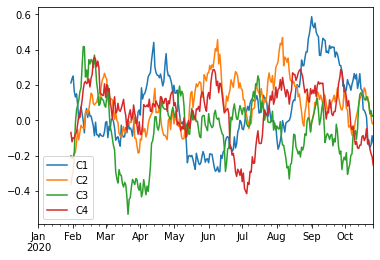

In [432]:
df.rolling(30).mean().plot()

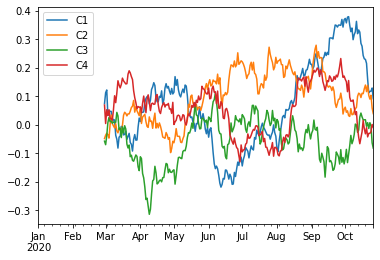

In [433]:
df.rolling(60).mean().plot()

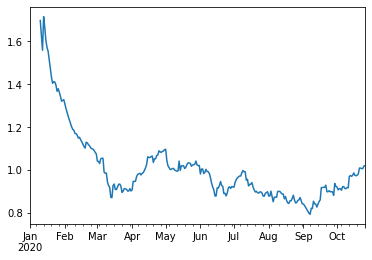

In [434]:
df.C1.rolling(60, min_periods=10).std().plot()

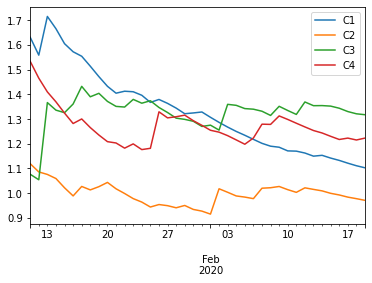

In [435]:
df.rolling(60, min_periods=10).std()[10:50].plot()

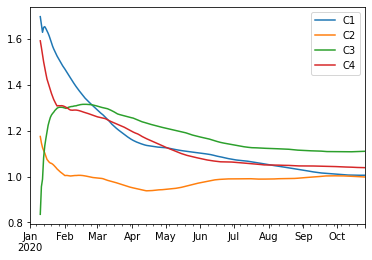

In [436]:
df.rolling(60, min_periods=10).std().expanding().mean().plot()

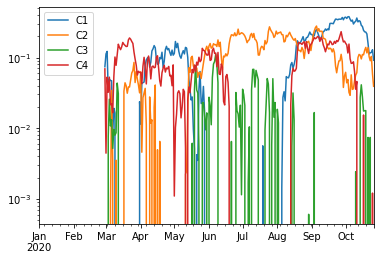

In [437]:
df.rolling(60).mean().plot(logy=True)

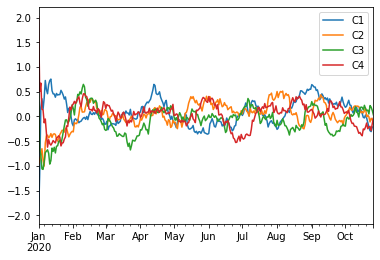

In [438]:
df.rolling('20D').mean().plot()

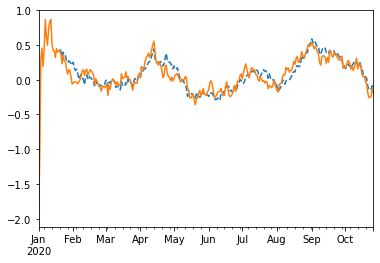

In [439]:
df.C1.rolling(30, min_periods=20).mean().plot(style='--', label='Simple MA')
df.C1.ewm(span=30).mean().plot(style='-', label='EWMA')

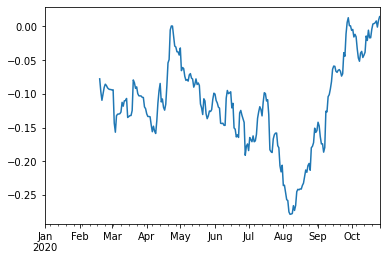

In [440]:
df.C1.rolling(100, min_periods=50).corr(df.C3).plot()

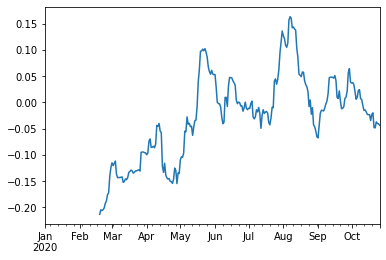

In [441]:
df.C2.rolling(100, min_periods=50).corr(df.C4).plot()

## 데이터 읽기 및 저장

|함수|설명|
|--|--|
|`read_csv`|파일,URL,객체도구로부터 구분된 데이터 읽기(기본 구분자:',')|
|`read_table`|파일,URL,객체도구로부터 구분된 데이터 읽기(기본 구분자:'\t')|
|`read_fwf`|고정폭 컬럼 형식에서 데이터 읽기(구분자 없는 데이터)|
|`read_clipboard`|클립보드에 있는 데이터 읽기, 웹페이지에 있는 표를 읽어올 때 유용|
|`read_exccel`|엑셀 파일(xls,xlsx)에서 표 형식 데이터 읽기|
|`read_hdf`|Pandas에서 저장한 HDFS파일의 데이터 읽기|
|`read_html`|HTML 문서 내의 모든 테이블 데이터 읽기|
|`read_json`|JSON에서 데이터 읽기|
|`read_msgpack`|메시지팩 바이너리 포맷으로 인코딩된 pandas 데이터 읽기|
|`read_pickle`|파이썬 피클 포맷으로 저장된 객체 읽기|
|`read_sas`|SAS 시스템의 사용자 정의 저장 포맷 데이터 읽기|
|`read_sql`|SQL 질의 결과를 DataFrame 형식으로 읽기|
|`read_stata`|Stata 파일에서 데이터 읽기|
|`read_feather`|Feather 바이너리 파일 포맷의 데이터 읽기|

### 텍스트 파일 읽기/쓰기

In [442]:
%%writefile example1.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv

Writing example1.csv


In [443]:
!ls

example1.csv  sample_data


In [444]:
pd.read_csv('example1.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [445]:
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv

Writing example2.csv


In [446]:
pd.read_csv('example2.csv', header=None)

,0,1,2,3,4,5
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [447]:
pd.read_csv('example2.csv', names=['a', 'b', 'c', 'd', 'e', 'text'])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [448]:
pd.read_csv('example2.csv', names=['a', 'b', 'c', 'd', 'e', 'text'], index_col='text')

,a,b,c,d,e
text,,,,,
hi,1,2,3,4,5
NaN,6,7,8,9,10 pandas
csv,11,12,13,14,15


In [449]:
%%writefile example3.txt
 a     b     c
1   0.1   0.2   0.3
2 0.4   0.5   0.6
3 0.7      0.8   0.9

Writing example3.txt


In [450]:
pd.read_table('example3.txt', sep='\s+')

,a,b,c
1,0.1,0.2,0.3
2,0.4,0.5,0.6
3,0.7,0.8,0.9


In [451]:
%%writefile example4.csv
# 파일 설명
a, b, c, d, e, text
# 컬럼은 a, b, c, d, e와 text가 있음
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv

Writing example4.csv


In [452]:
pd.read_csv('example4.csv', skiprows=[0,2])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [453]:
%%writefile example5.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10 pandas
11, NA, 13, 14, 15, csv

Writing example5.csv


In [454]:
pd.read_csv('example5.csv')

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NULL,10 pandas,NaN
2,11,NA,13,14,15,csv


In [455]:
%%writefile example6.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv

Writing example6.csv


In [456]:
pd.read_csv('example6.csv', nrows=5)

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv
3,1,2,3,4,5,hi
4,6,7,8,9,10 pandas,NaN


In [457]:
df = pd.read_csv('example6.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv
3,1,2,3,4,5,hi
4,6,7,8,9,10 pandas,NaN
5,11,12,13,14,15,csv
6,1,2,3,4,5,hi
7,6,7,8,9,10 pandas,NaN
8,11,12,13,14,15,csv
9,1,2,3,4,5,hi


In [458]:
df.to_csv('output.csv')

In [459]:
!cat output.csv

,a, b, c, d, e, text
0,1,2,3,4, 5, hi
1,6,7,8,9, 10 pandas,
2,11,12,13,14, 15, csv
3,1,2,3,4, 5, hi
4,6,7,8,9, 10 pandas,
5,11,12,13,14, 15, csv
6,1,2,3,4, 5, hi
7,6,7,8,9, 10 pandas,
8,11,12,13,14, 15, csv
9,1,2,3,4, 5, hi
10,6,7,8,9, 10 pandas,
11,11,12,13,14, 15, csv
12,1,2,3,4, 5, hi
13,6,7,8,9, 10 pandas,
14,11,12,13,14, 15, csv
15,1,2,3,4, 5, hi
16,6,7,8,9, 10 pandas,
17,11,12,13,14, 15, csv
18,1,2,3,4, 5, hi
19,6,7,8,9, 10 pandas,
20,11,12,13,14, 15, csv
21,1,2,3,4, 5, hi
22,6,7,8,9, 10 pandas,
23,11,12,13,14, 15, csv


In [460]:
dr = pd.date_range('2020-01-01', periods=10)
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int64

In [461]:
ts.to_csv('ts.csv', header=['value'])

In [462]:
!cat ts.csv

,value
2020-01-01,0
2020-01-02,1
2020-01-03,2
2020-01-04,3
2020-01-05,4
2020-01-06,5
2020-01-07,6
2020-01-08,7
2020-01-09,8
2020-01-10,9


In [463]:
%%writefile example.json
[{"a":1, "b":2, "c":3, "d":4, "e":5},
{"a":6, "b":7, "c":8, "d":9, "e":10},
 {"a":11, "b":12, "c":13, "d":14, "e":15}]

Writing example.json


In [464]:
!cat example.json

[{"a":1, "b":2, "c":3, "d":4, "e":5},
{"a":6, "b":7, "c":8, "d":9, "e":10},
 {"a":11, "b":12, "c":13, "d":14, "e":15}]

In [465]:
pd.read_json('example.json')

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15


In [466]:
ts.to_json('output.json')

In [467]:
!cat output.json

{"1577836800000":0,"1577923200000":1,"1578009600000":2,"1578096000000":3,"1578182400000":4,"1578268800000":5,"1578355200000":6,"1578441600000":7,"1578528000000":8,"1578614400000":9}

In [468]:
df.to_json("output.json")

In [469]:
!cat output.json

{"a":{"0":1,"1":6,"2":11,"3":1,"4":6,"5":11,"6":1,"7":6,"8":11,"9":1,"10":6,"11":11,"12":1,"13":6,"14":11,"15":1,"16":6,"17":11,"18":1,"19":6,"20":11,"21":1,"22":6,"23":11}," b":{"0":2,"1":7,"2":12,"3":2,"4":7,"5":12,"6":2,"7":7,"8":12,"9":2,"10":7,"11":12,"12":2,"13":7,"14":12,"15":2,"16":7,"17":12,"18":2,"19":7,"20":12,"21":2,"22":7,"23":12}," c":{"0":3,"1":8,"2":13,"3":3,"4":8,"5":13,"6":3,"7":8,"8":13,"9":3,"10":8,"11":13,"12":3,"13":8,"14":13,"15":3,"16":8,"17":13,"18":3,"19":8,"20":13,"21":3,"22":8,"23":13}," d":{"0":4,"1":9,"2":14,"3":4,"4":9,"5":14,"6":4,"7":9,"8":14,"9":4,"10":9,"11":14,"12":4,"13":9,"14":14,"15":4,"16":9,"17":14,"18":4,"19":9,"20":14,"21":4,"22":9,"23":14}," e":{"0":" 5","1":" 10 pandas","2":" 15","3":" 5","4":" 10 pandas","5":" 15","6":" 5","7":" 10 pandas","8":" 15","9":" 5","10":" 10 pandas","11":" 15","12":" 5","13":" 10 pandas","14":" 15","15":" 5","16":" 10 pandas","17":" 15","18":" 5","19":" 10 pandas","20":" 15","21":" 5","22":" 10 pandas","23":" 15"}

### 이진 데이터 파일 읽기/쓰기

In [470]:
df = pd.read_csv('example1.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [471]:
df.to_pickle('df_pickle')
pd.read_pickle('df_pickle')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [472]:
df = pd.DataFrame({'a': np.random.randn(100),
                   'b': np.random.randn(100),
                   'c': np.random.randn(100),})
df

,a,b,c
0,-2.677528,0.595478,1.601487
1,-0.872210,-0.776610,0.360747
2,-0.812858,-0.098153,-0.031207
3,-1.145556,0.542318,0.430511
4,1.097138,-0.376467,1.007522
...,...,...,...
95,0.282357,1.606097,0.931293
96,0.819650,-0.198134,0.060048
97,2.106368,-0.385754,0.971300
98,-1.849903,-0.095822,-0.170633


In [473]:
h = pd.HDFStore('data.h5')
h['obj1'] = df
h['obj1_col1'] = df['a']
h['obj1_col2'] = df['b']
h['obj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: data.h5

In [474]:
h['obj1']

,a,b,c
0,-2.677528,0.595478,1.601487
1,-0.872210,-0.776610,0.360747
2,-0.812858,-0.098153,-0.031207
3,-1.145556,0.542318,0.430511
4,1.097138,-0.376467,1.007522
...,...,...,...
95,0.282357,1.606097,0.931293
96,0.819650,-0.198134,0.060048
97,2.106368,-0.385754,0.971300
98,-1.849903,-0.095822,-0.170633


In [475]:
h.put('obj2', df, format='table')

In [476]:
h.select('obj2', where=['index > 50 and index <= 60'])

,a,b,c
51,2.686916,0.724302,-1.155075
52,0.808000,-0.801787,0.079974
53,0.325844,0.214426,-0.085524
54,-1.947213,-0.958427,0.688957
55,-0.772700,-0.206179,-0.572376
56,0.794786,-0.520958,0.153971
57,0.536415,0.902950,1.542584
58,0.673874,0.038423,-0.175556
59,1.426061,0.008025,-2.344557
60,-0.785797,-1.635188,0.525531


In [477]:
h.close()

In [478]:
df.to_hdf('data.h5', 'obj3', format='table')

In [479]:
pd.read_hdf('data.h5','obj3', where=['index < 10'])

,a,b,c
0,-2.677528,0.595478,1.601487
1,-0.872210,-0.776610,0.360747
2,-0.812858,-0.098153,-0.031207
3,-1.145556,0.542318,0.430511
4,1.097138,-0.376467,1.007522
5,0.713227,-0.057890,0.927208
6,-0.522316,-0.781404,-0.131492
7,1.970529,0.981542,0.767360
8,-0.327630,-1.147090,0.351324
9,-0.429657,1.013744,-0.161820


In [480]:
df.to_excel('example.xlsx', 'Sheet1')

In [481]:
!ls

data.h5       example2.csv  example5.csv  example.xlsx	sample_data
df_pickle     example3.txt  example6.csv  output.csv	ts.csv
example1.csv  example4.csv  example.json  output.json


In [482]:
pd.read_excel('example.xlsx', 'Sheet1')

,Unnamed: 0,a,b,c
0,0,-2.677528,0.595478,1.601487
1,1,-0.872210,-0.776610,0.360747
2,2,-0.812858,-0.098153,-0.031207
3,3,-1.145556,0.542318,0.430511
4,4,1.097138,-0.376467,1.007522
...,...,...,...,...
95,95,0.282357,1.606097,0.931293
96,96,0.819650,-0.198134,0.060048
97,97,2.106368,-0.385754,0.971300
98,98,-1.849903,-0.095822,-0.170633


## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

In [483]:
a = np.array([1, 2, None, 4, 5])
a

array([1, 2, None, 4, 5], dtype=object)

In [484]:
a.sum() # None 계산 불가능

TypeError: ignored

#### NaN: 누락된 수치 데이터

In [485]:
a = np.array([1, 2, np.nan, 4, 5])
a.dtype

dtype('float64')

In [486]:
0 + np.nan

nan

In [487]:
np.nan + np.nan

nan

In [488]:
a.sum(), a.min(), a.max()

(nan, nan, nan)

In [489]:
np.nansum(a), np.nanmin(a), np.nanmax(a) # nan값 빼고 계산

(12.0, 1.0, 5.0)

In [490]:
pd.Series([1, 2, np.nan, 4, None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [491]:
s = pd.Series(range(5), dtype=int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [492]:
s[0] = None
s

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [493]:
s[3] = np.nan

In [494]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

#### Null 값 처리

|인자|설명|
|--|--|
|`isnull()`|누락되거나 NA인 값을 불리언 값으로 변환|
|`notnull()`|`isnull`의 반대|
|`dropna()`|누락된 데이터가 있는 축 제외|
|`fillna()`|누락된 값을 대체하거나 `ffill`이나 `bfill`로 보간 메소드 적용|

In [495]:
s = pd.Series([1, 2, np.nan, 'String', None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [496]:
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [497]:
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [498]:
s.dropna()

0         1
1         2
3    String
dtype: object

In [499]:
df.dropna(axis='columns')

,a,b,c
0,-2.677528,0.595478,1.601487
1,-0.872210,-0.776610,0.360747
2,-0.812858,-0.098153,-0.031207
3,-1.145556,0.542318,0.430511
4,1.097138,-0.376467,1.007522
...,...,...,...
95,0.282357,1.606097,0.931293
96,0.819650,-0.198134,0.060048
97,2.106368,-0.385754,0.971300
98,-1.849903,-0.095822,-0.170633


In [500]:
df[3] = np.nan
df

,a,b,c,3
0,-2.677528,0.595478,1.601487,NaN
1,-0.872210,-0.776610,0.360747,NaN
2,-0.812858,-0.098153,-0.031207,NaN
3,-1.145556,0.542318,0.430511,NaN
4,1.097138,-0.376467,1.007522,NaN
...,...,...,...,...
95,0.282357,1.606097,0.931293,NaN
96,0.819650,-0.198134,0.060048,NaN
97,2.106368,-0.385754,0.971300,NaN
98,-1.849903,-0.095822,-0.170633,NaN


In [501]:
df.dropna(axis='columns', how='all')

,a,b,c
0,-2.677528,0.595478,1.601487
1,-0.872210,-0.776610,0.360747
2,-0.812858,-0.098153,-0.031207
3,-1.145556,0.542318,0.430511
4,1.097138,-0.376467,1.007522
...,...,...,...
95,0.282357,1.606097,0.931293
96,0.819650,-0.198134,0.060048
97,2.106368,-0.385754,0.971300
98,-1.849903,-0.095822,-0.170633


In [502]:
df.dropna(axis='rows', thresh=3)

,a,b,c,3
0,-2.677528,0.595478,1.601487,NaN
1,-0.872210,-0.776610,0.360747,NaN
2,-0.812858,-0.098153,-0.031207,NaN
3,-1.145556,0.542318,0.430511,NaN
4,1.097138,-0.376467,1.007522,NaN
...,...,...,...,...
95,0.282357,1.606097,0.931293,NaN
96,0.819650,-0.198134,0.060048,NaN
97,2.106368,-0.385754,0.971300,NaN
98,-1.849903,-0.095822,-0.170633,NaN


In [503]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [504]:
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [505]:
s.fillna(method='ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [506]:
s.fillna(method='bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [507]:
df

,a,b,c,3
0,-2.677528,0.595478,1.601487,NaN
1,-0.872210,-0.776610,0.360747,NaN
2,-0.812858,-0.098153,-0.031207,NaN
3,-1.145556,0.542318,0.430511,NaN
4,1.097138,-0.376467,1.007522,NaN
...,...,...,...,...
95,0.282357,1.606097,0.931293,NaN
96,0.819650,-0.198134,0.060048,NaN
97,2.106368,-0.385754,0.971300,NaN
98,-1.849903,-0.095822,-0.170633,NaN


In [508]:
df.fillna(method='ffill', axis=0)

,a,b,c,3
0,-2.677528,0.595478,1.601487,NaN
1,-0.872210,-0.776610,0.360747,NaN
2,-0.812858,-0.098153,-0.031207,NaN
3,-1.145556,0.542318,0.430511,NaN
4,1.097138,-0.376467,1.007522,NaN
...,...,...,...,...
95,0.282357,1.606097,0.931293,NaN
96,0.819650,-0.198134,0.060048,NaN
97,2.106368,-0.385754,0.971300,NaN
98,-1.849903,-0.095822,-0.170633,NaN


In [509]:
df.fillna(method='ffill', axis=1)

,a,b,c,3
0,-2.677528,0.595478,1.601487,1.601487
1,-0.872210,-0.776610,0.360747,0.360747
2,-0.812858,-0.098153,-0.031207,-0.031207
3,-1.145556,0.542318,0.430511,0.430511
4,1.097138,-0.376467,1.007522,1.007522
...,...,...,...,...
95,0.282357,1.606097,0.931293,0.931293
96,0.819650,-0.198134,0.060048,0.060048
97,2.106368,-0.385754,0.971300,0.971300
98,-1.849903,-0.095822,-0.170633,-0.170633


In [510]:
df.fillna(method='bfill', axis=0)

,a,b,c,3
0,-2.677528,0.595478,1.601487,NaN
1,-0.872210,-0.776610,0.360747,NaN
2,-0.812858,-0.098153,-0.031207,NaN
3,-1.145556,0.542318,0.430511,NaN
4,1.097138,-0.376467,1.007522,NaN
...,...,...,...,...
95,0.282357,1.606097,0.931293,NaN
96,0.819650,-0.198134,0.060048,NaN
97,2.106368,-0.385754,0.971300,NaN
98,-1.849903,-0.095822,-0.170633,NaN


In [511]:
df. fillna(method='bfill', axis=1)

,a,b,c,3
0,-2.677528,0.595478,1.601487,NaN
1,-0.872210,-0.776610,0.360747,NaN
2,-0.812858,-0.098153,-0.031207,NaN
3,-1.145556,0.542318,0.430511,NaN
4,1.097138,-0.376467,1.007522,NaN
...,...,...,...,...
95,0.282357,1.606097,0.931293,NaN
96,0.819650,-0.198134,0.060048,NaN
97,2.106368,-0.385754,0.971300,NaN
98,-1.849903,-0.095822,-0.170633,NaN


### 중복 제거

In [512]:
df = pd.DataFrame({'c1': ['a', 'b', 'c'] * 2 + ['b'] + ['c'],
                   'c2': [1, 2, 1, 1, 2, 3, 3, 4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [513]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [514]:
df.drop_duplicates()

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환

In [515]:
s = pd.Series([1., 2., -999, 3., -1000., 4.])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [516]:
s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [517]:
s.replace([-999, -1000], np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [518]:
s.replace([-999, -1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    3.0
4    0.0
5    4.0
dtype: float64

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly